In [50]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
from players import rebel_player, random_player
import matplotlib.pyplot as plt
from games.liars_dice import LiarsDice
import numpy as np
from tqdm import tqdm
import torch
from tasks import build_value_net

In [38]:
def tournament_random(players, game, v_net, num_games = 100, depth_limit=3, node_limit = None):
    scores = []
    for i in tqdm(range(num_games)):
        h1,h2 = game.sample_hands()
        agents = [rebel_player(game, h1, v_net, depth_limit=depth_limit, node_limit=node_limit),random_player(game, h2)]
        current_state = ('root',)
        last_move = None
        turn = 0
        while not game.is_terminal(current_state):
            last_move = agents[turn].take_action(last_move)
            current_state = (*current_state, last_move)
            turn = 1-turn
        reward = game.get_rewards(current_state, h1, h2)
        print(f'Final State - {current_state}')
        print(f'winner - {reward}')
        scores.append(reward)
        print(f'current Record - {sum(scores)}')
    return(np.array(scores))

def rebelVsrebel(game, v_net, num_games = 100, dl1=3, dl2 = 4, nl1 = None, nl2=1500):
    scores = []
    for i in tqdm(range(num_games)):
        h1,h2 = game.sample_hands()
        agents = [rebel_player(game, h1, v_net, depth_limit=dl1, node_limit=nl1),rebel_player(game, h2, v_net, depth_limit=dl2, node_limit=nl2)]
        current_state = ('root',)
        last_move = None
        turn = 0
        while not game.is_terminal(current_state):
            last_move = agents[turn].take_action(last_move)
            current_state = (*current_state, last_move)
            turn = 1-turn
        reward = game.get_rewards(current_state, h1, h2)
        print(f'Final State - {current_state}')
        print(f'winner - {reward}')
        scores.append(reward)
        print(f'current Record - {sum(scores)}')
        
        agents = [rebel_player(game, h2, v_net, depth_limit=dl2, node_limit=nl2),rebel_player(game, h1, v_net, depth_limit=dl1, node_limit=nl1)]
        current_state = ('root',)
        last_move = None
        turn = 0
        while not game.is_terminal(current_state):
            last_move = agents[turn].take_action(last_move)
            current_state = (*current_state, last_move)
            turn = 1-turn
        reward = game.get_rewards(current_state, h1, h2)
        reward = -1*reward
        print(f'Final State - {current_state}')
        print(f'winner - {reward}')
        scores.append(reward)
        print(f'current Record - {sum(scores)}')
    return(np.array(scores))

In [24]:
players = [rebel_player, random_player]
game = LiarsDice(3,3)

In [19]:
epoch = 50
path = f'models/liars_dice_pcap_3_3_{epoch}.t7'
state_dict = torch.load(path)['state_dict']
v_net = build_value_net(game)
v_net.load_state_dict(state_dict)

<All keys matched successfully>

In [20]:
a = [1,2,3]
a.reverse()
a

[3, 2, 1]

In [31]:
results1 = run_tournament(players, game, v_net, 50, 4, 2000)


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

[1.25349711e-001 1.23201558e-001 1.20542675e-001 1.17061862e-001
 1.12061457e-001 1.11691788e-001 9.90890352e-002 9.74504580e-002
 3.73125518e-101 9.35514552e-002 3.73125518e-101 3.73125518e-101
 3.73125518e-101 3.73125518e-101 3.73125518e-101 3.73125518e-101
 3.73125518e-101 3.73125518e-101 0.00000000e+000]
[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 3.08810988e-001 2.32459625e-001 6.27124329e-100
 2.55236669e-001 6.27124329e-100 6.27124329e-100 2.03492718e-001
 6.27124329e-100 6.27124329e-100 6.27124329e-100]
rebuilding subgame
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 5.41600158e-99 1.00000000e+00]
rebuilding subgame


  2%|█▋                                                                                 | 1/50 [00:29<23:54, 29.27s/it]

q,f=6,1
matches = 1, 3
0
Final State - ('root', 5, 8, 15, 16, 18)
winner - 1
current Record - 1
[9.09261571e-002 9.03731552e-002 8.96794758e-002 8.87816020e-002
 8.80244100e-002 8.80124722e-002 8.49929754e-002 8.14337528e-002
 8.52872654e-002 7.81171557e-002 6.31215234e-002 7.12500550e-002
 4.20503916e-101 4.20503916e-101 4.20503916e-101 4.20503916e-101
 4.20503916e-101 4.20503916e-101 0.00000000e+000]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
rebuilding subgame


  4%|███▎                                                                               | 2/50 [00:48<20:54, 26.14s/it]

q,f=6,2
matches = 3, 1
0
Final State - ('root', 4, 17, 18)
winner - 1
current Record - 2
[1.46451817e-001 1.42970884e-001 1.38596309e-001 1.32408683e-001
 1.23311062e-001 1.19848022e-001 1.03548935e-001 9.28642875e-002
 4.50076640e-101 4.50076640e-101 4.50076640e-101 4.50076640e-101
 4.50076640e-101 4.50076640e-101 4.50076640e-101 4.50076640e-101
 4.50076640e-101 4.50076640e-101 0.00000000e+000]
[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 4.51484119e-100
 4.51484119e-100 5.90804303e-001 4.51484119e-100 4.51484119e-100
 4.09195697e-001 4.51484119e-100 4.51484119e-100]
rebuilding subgame
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
rebuilding subgame


  6%|████▉                                                                              | 3/50 [01:27<23:33, 30.08s/it]

q,f=6,2
matches = 1, 1
0
Final State - ('root', 4, 10, 16, 17, 18)
winner - 1
current Record - 3
[1.09742173e-001 1.07502230e-001 1.04755290e-001 1.01398662e-001
 9.73374505e-002 9.36280738e-002 8.61780316e-002 8.08096859e-002
 4.92050459e-002 6.14497793e-002 1.07993578e-001 3.14509274e-101
 3.14509274e-101 3.14509274e-101 3.14509274e-101 3.14509274e-101
 3.14509274e-101 3.14509274e-101 0.00000000e+000]
[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 3.34981213e-001
 4.79585972e-100 3.33594792e-001 3.31423996e-001 4.79585972e-100
 4.79585972e-100 4.79585972e-100 4.79585972e-100 4.79585972e-100
 4.79585972e-100 4.79585972e-100 4.79585972e-100]
rebuilding subgame
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 7.55073852e-99 7.55073852e-99 7.55073852e-99
 7.55073852e-99 7.55

  8%|██████▋                                                                            | 4/50 [01:38<18:40, 24.37s/it]

q,f=5,0
matches = 2, 2
0
Final State - ('root', 1, 6, 7, 12, 18)
winner - 1
current Record - 4
[1.37466602e-001 1.34484255e-001 1.30749485e-001 1.25737861e-001
 1.19315935e-001 1.16540171e-001 1.05198208e-001 1.04378074e-001
 4.37621775e-101 4.37621775e-101 2.61294092e-002 4.37621775e-101
 4.37621775e-101 4.37621775e-101 4.37621775e-101 4.37621775e-101
 4.37621775e-101 4.37621775e-101 0.00000000e+000]
[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 2.42025519e-001 2.89521297e-001 3.43164927e-100
 3.43164927e-100 2.90694048e-001 3.43164927e-100 3.43164927e-100
 1.77759135e-001 3.43164927e-100 3.43164927e-100]
rebuilding subgame
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.0171306  0.0171306  0.0171306  0.0171306  0.0171306  0.0171306
 0.89721642]
rebuilding subgame


 10%|████████▎                                                                          | 5/50 [02:06<19:06, 25.48s/it]

q,f=4,2
matches = 1, 2
0
Final State - ('root', 7, 8, 10, 11, 18)
winner - 1
current Record - 5


 12%|█████████▉                                                                         | 6/50 [02:09<13:49, 18.86s/it]

[4.77136128e-002 4.78622152e-002 4.81068342e-002 4.84886545e-002
 4.90687313e-002 4.99395036e-002 5.06585678e-002 5.31576799e-002
 4.93009081e-002 5.25759827e-002 6.50521450e-002 4.18875007e-002
 4.52722856e-002 9.53737340e-002 3.33759347e-002 1.59707040e-002
 2.06195006e-001 1.05055694e-100 0.00000000e+000]
q,f=5,1
matches = 3, 2
1
Final State - ('root', 13, 18)
winner - 1
current Record - 6
[8.78809203e-101 8.78809203e-101 8.78809203e-101 8.78809203e-101
 8.78809203e-101 8.78809203e-101 8.78809203e-101 8.78809203e-101
 8.78809203e-101 8.78809203e-101 1.00000000e+000 8.78809203e-101
 8.78809203e-101 8.78809203e-101 8.78809203e-101 8.78809203e-101
 8.78809203e-101 8.78809203e-101 0.00000000e+000]
[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 7.25857027e-100
 7.25857027e-100 7.25857027e-100 1

 14%|███████████▌                                                                       | 7/50 [03:00<20:26, 28.52s/it]

q,f=5,2
matches = 1, 1
0
Final State - ('root', 10, 14, 18)
winner - 1
current Record - 7
[8.25002405e-101 8.25002405e-101 8.25002405e-101 8.25002405e-101
 7.33195663e-004 8.25002405e-101 8.25002405e-101 8.25002405e-101
 8.25002405e-101 8.25002405e-101 9.99266804e-001 8.25002405e-101
 8.25002405e-101 8.25002405e-101 8.25002405e-101 8.25002405e-101
 8.25002405e-101 8.25002405e-101 0.00000000e+000]
[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 6.21768865e-100 6.21768865e-100
 6.21768865e-100 6.21768865e-100 1.00000000e+000]
rebuilding subgame


 16%|█████████████▎                                                                     | 8/50 [03:44<23:04, 32.97s/it]

q,f=5,1
matches = 2, 1
0
Final State - ('root', 10, 13, 18)
winner - 1
current Record - 8
[1.27237275e-001 1.24177941e-001 1.19662228e-001 1.13863853e-001
 1.08440063e-001 1.02325719e-001 9.06605246e-002 7.79355098e-002
 6.00652488e-002 3.87404725e-101 7.56316374e-002 3.87404725e-101
 3.87404725e-101 3.87404725e-101 3.87404725e-101 3.87404725e-101
 3.87404725e-101 3.87404725e-101 0.00000000e+000]
[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 4.97748021e-001 2.96663425e-100
 2.47824594e-001 2.96663425e-100 2.96663425e-100 2.54427385e-001
 2.96663425e-100 2.96663425e-100 2.96663425e-100]
rebuilding subgame
[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 1.0784252e-99 1.0000000e+00]


 18%|██████████████▉                                                                    | 9/50 [04:41<27:26, 40.17s/it]

q,f=6,1
matches = 2, 3
0
Final State - ('root', 7, 9, 15, 16, 18)
winner - 1
current Record - 9
[1.30795450e-001 1.34753002e-001 1.23691226e-001 1.11145653e-001
 9.55557678e-002 3.46086022e-101 6.40415109e-002 6.30380004e-002
 3.46086022e-101 3.46086022e-101 2.76979391e-001 3.46086022e-101
 3.46086022e-101 3.46086022e-101 3.46086022e-101 3.46086022e-101
 3.46086022e-101 3.46086022e-101 0.00000000e+000]
[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 6.03123561e-100 6.03123561e-100
 3.13515852e-001 6.03123561e-100 6.86484148e-001]
rebuilding subgame


 20%|████████████████▍                                                                 | 10/50 [04:59<22:17, 33.44s/it]

q,f=5,1
matches = 2, 1
0
Final State - ('root', 6, 13, 18)
winner - 1
current Record - 10


 22%|██████████████████                                                                | 11/50 [05:23<19:55, 30.65s/it]

[1.16028857e-001 1.14055197e-001 1.10901979e-001 1.06821765e-001
 1.02268783e-001 1.01941561e-001 9.12552732e-002 7.83370835e-002
 8.35570513e-002 6.00398639e-002 3.47925861e-002 4.30146837e-101
 4.30146837e-101 4.30146837e-101 4.30146837e-101 4.30146837e-101
 4.30146837e-101 4.30146837e-101 0.00000000e+000]
q,f=2,2
matches = 2, 0
1
Final State - ('root', 5, 18)
winner - 1
current Record - 11
[1.38445056e-001 1.38091942e-001 1.36595548e-001 1.40608101e-001
 1.43234116e-001 3.83617104e-101 1.93375522e-001 3.83617104e-101
 3.83617104e-101 1.09649715e-001 3.83617104e-101 3.83617104e-101
 3.83617104e-101 3.83617104e-101 3.83617104e-101 3.83617104e-101
 3.83617104e-101 3.83617104e-101 0.00000000e+000]
[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 5.65416789e-100 4.40239578e-001 5.65416789e-100
 5.65416789e-100 3.52738955e-001 5.65416789e-100 5.65416789e-100
 2.07021466e-001 5.65416789e-100 5.65416789e-100 5.65416789e-100
 5.65416789e-100 5.65416789e-100 5

 24%|███████████████████▋                                                              | 12/50 [05:57<20:11, 31.89s/it]

q,f=5,1
matches = 0, 3
0
Final State - ('root', 1, 4, 6, 13, 18)
winner - 1
current Record - 12
[1.06697196e-001 1.25816528e-001 1.06783455e-001 1.01200014e-001
 9.14002510e-002 3.55313840e-101 7.71510139e-002 8.02769675e-002
 3.55313840e-101 3.55313840e-101 3.10674574e-001 3.55313840e-101
 3.55313840e-101 3.55313840e-101 3.55313840e-101 3.55313840e-101
 3.55313840e-101 3.55313840e-101 0.00000000e+000]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.54183143e-99
 1.54183143e-99 1.54183143e-99 1.00000000e+00]
rebuilding subgame


 26%|█████████████████████▎                                                            | 13/50 [06:24<18:45, 30.43s/it]

q,f=5,2
matches = 0, 2
0
Final State - ('root', 1, 14, 18)
winner - 1
current Record - 13
[1.45671510e-001 1.43121317e-001 1.39999936e-001 1.35220619e-001
 1.26857957e-001 1.27511794e-001 9.79497218e-002 8.36671449e-002
 3.96904777e-101 3.96904777e-101 3.96904777e-101 3.96904777e-101
 3.96904777e-101 3.96904777e-101 3.96904777e-101 3.96904777e-101
 3.96904777e-101 3.96904777e-101 0.00000000e+000]
[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.5344226e-99 1.5344226e-99
 1.0000000e+00 1.5344226e-99 1.5344226e-99 1.5344226e-99]
rebuilding subgame
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
rebuilding subgame


 28%|██████████████████████▉                                                           | 14/50 [07:15<21:52, 36.45s/it]

q,f=6,2
matches = 1, 3
0
Final State - ('root', 5, 12, 15, 17, 18)
winner - 1
current Record - 14
[1.45671510e-001 1.43121317e-001 1.39999936e-001 1.35220619e-001
 1.26857957e-001 1.27511794e-001 9.79497218e-002 8.36671449e-002
 3.96904777e-101 3.96904777e-101 3.96904777e-101 3.96904777e-101
 3.96904777e-101 3.96904777e-101 3.96904777e-101 3.96904777e-101
 3.96904777e-101 3.96904777e-101 0.00000000e+000]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
rebuilding subgame


 30%|████████████████████████▌                                                         | 15/50 [08:00<22:49, 39.12s/it]

q,f=6,2
matches = 1, 2
0
Final State - ('root', 5, 17, 18)
winner - 1
current Record - 15
[1.12501642e-001 1.22759625e-001 1.19157472e-001 1.06548850e-001
 9.36409941e-002 1.31462775e-001 6.45773919e-002 5.78717218e-002
 3.39443585e-101 3.39443585e-101 1.91479528e-001 3.39443585e-101
 3.39443585e-101 3.39443585e-101 3.39443585e-101 3.39443585e-101
 3.39443585e-101 3.39443585e-101 0.00000000e+000]
[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 6.21288074e-100 6.21288074e-100
 6.21288074e-100 6.21288074e-100 1.00000000e+000]
rebuilding subgame


 32%|██████████████████████████▏                                                       | 16/50 [08:26<19:51, 35.03s/it]

q,f=5,1
matches = 2, 2
0
Final State - ('root', 10, 13, 18)
winner - 1
current Record - 16


 34%|███████████████████████████▉                                                      | 17/50 [08:53<17:56, 32.62s/it]

[1.03890181e-001 1.16037164e-001 1.11725560e-001 9.88443525e-002
 8.97436046e-002 1.35933496e-001 6.04844991e-002 5.91015169e-002
 3.48006987e-101 3.48006987e-101 2.24239627e-001 3.48006987e-101
 3.48006987e-101 3.48006987e-101 3.48006987e-101 3.48006987e-101
 3.48006987e-101 3.48006987e-101 0.00000000e+000]
[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 2.08370523e-001 1.93904971e-001 1.02801548e-001 9.30418512e-002
 8.88046492e-002 5.62735616e-100 3.13076458e-001]
q,f=5,0
matches = 2, 2
1
Final State - ('root', 5, 11, 12, 18)
winner - -1
current Record - 15


 36%|█████████████████████████████▌                                                    | 18/50 [09:30<18:03, 33.84s/it]

[6.55184138e-002 7.87964964e-002 7.18913051e-002 6.10888297e-002
 4.46796637e-002 1.28048377e-001 2.40585971e-002 2.00785210e-002
 5.04098416e-101 5.04098416e-101 5.05839796e-001 5.04098416e-101
 5.04098416e-101 5.04098416e-101 5.04098416e-101 5.04098416e-101
 5.04098416e-101 5.04098416e-101 0.00000000e+000]
q,f=4,1
matches = 2, 2
1
Final State - ('root', 10, 18)
winner - 1
current Record - 16
[1.18099969e-001 1.18432948e-001 1.18000063e-001 1.22684106e-001
 1.28291660e-001 3.62540433e-101 1.62245823e-001 7.94567974e-002
 3.62540433e-101 1.52788634e-001 3.62540433e-101 3.62540433e-101
 3.62540433e-101 3.62540433e-101 3.62540433e-101 3.62540433e-101
 3.62540433e-101 3.62540433e-101 0.00000000e+000]
[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 9.75553715e-100 9.75553715e-100 9.75553715e-100
 9.75553715e-100 9.75553715e-100 9.75553715e-100 9.75553715e-100
 9.75553715e-100 9.75553715e-100 

 38%|███████████████████████████████▏                                                  | 19/50 [09:44<14:29, 28.04s/it]

q,f=3,2
matches = 0, 1
0
Final State - ('root', 6, 8, 18)
winner - 1
current Record - 17
[1.62730068e-001 1.62325872e-001 1.59341707e-001 1.54480759e-001
 1.43674106e-001 3.23260246e-101 1.09008133e-001 6.15421961e-002
 3.23260246e-101 4.68971597e-002 3.23260246e-101 3.23260246e-101
 3.23260246e-101 3.23260246e-101 3.23260246e-101 3.23260246e-101
 3.23260246e-101 3.23260246e-101 0.00000000e+000]
[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 6.73232575e-100 6.73232575e-100 5.08180467e-001
 6.73232575e-100 6.73232575e-100 4.91819533e-001]
rebuilding subgame


 40%|████████████████████████████████▊                                                 | 20/50 [10:16<14:34, 29.15s/it]

q,f=5,0
matches = 2, 2
0
Final State - ('root', 2, 12, 18)
winner - 1
current Record - 18
[1.26914797e-001 1.24732181e-001 1.22004003e-001 1.18404640e-001
 1.13131231e-001 1.13000056e-001 9.89758236e-002 9.66212773e-002
 3.73804405e-101 8.62159918e-002 3.73804405e-101 3.73804405e-101
 3.73804405e-101 3.73804405e-101 3.73804405e-101 3.73804405e-101
 3.73804405e-101 3.73804405e-101 0.00000000e+000]
[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 1.78624875e-001 1.85216520e-001 1.95627892e-001 1.59487407e-001
 3.78767709e-100 1.61056015e-001 3.78767709e-100 3.78767709e-100
 9.52480029e-002 3.78767709e-100 3.78767709e-100 2.47392881e-002
 3.78767709e-100 3.78767709e-100 3.78767709e-100]
rebuilding subgame
[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 5.55278387e-001
 9.61765803e-100 4.44721613e-001 9.61765803e-100 9.61765803e-100
 9.61765803e-100 9.61765803e-100 9.61765803e-100 9.61765803e-100
 9.61765803

 42%|██████████████████████████████████▍                                               | 21/50 [10:53<15:15, 31.57s/it]

q,f=6,1
matches = 1, 3
0
Final State - ('root', 1, 3, 4, 6, 9, 16, 18)
winner - 1
current Record - 19
[1.27619777e-001 1.28174885e-001 1.20945794e-001 1.11424457e-001
 9.77247059e-002 1.21283909e-001 6.36264042e-002 5.60436194e-002
 3.35184883e-101 3.51050991e-003 1.69645938e-001 3.35184883e-101
 3.35184883e-101 3.35184883e-101 3.35184883e-101 3.35184883e-101
 3.35184883e-101 3.35184883e-101 0.00000000e+000]
[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 1.00000000e+000 9.52276126e-100
 9.52276126e-100 9.52276126e-100 9.52276126e-100 9.52276126e-100
 9.52276126e-100 9.52276126e-100 9.52276126e-100]
rebuilding subgame


 44%|████████████████████████████████████                                              | 22/50 [11:15<13:24, 28.72s/it]

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.52096419e-99 2.52096419e-99
 2.52096419e-99 2.52096419e-99 1.00000000e+00]
rebuilding subgame
q,f=5,1
matches = 2, 2
0
Final State - ('root', 3, 9, 10, 13, 18)
winner - 1
current Record - 20
[1.08427227e-001 1.19638187e-001 1.15548917e-001 1.02656038e-001
 9.26745464e-002 1.34346910e-001 6.22233869e-002 5.80891311e-002
 3.43073988e-101 3.43073988e-101 2.06395657e-001 3.43073988e-101
 3.43073988e-101 3.43073988e-101 3.43073988e-101 3.43073988e-101
 3.43073988e-101 3.43073988e-101 0.00000000e+000]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
rebuilding subgame


 46%|█████████████████████████████████████▋                                            | 23/50 [11:44<12:54, 28.68s/it]

q,f=6,2
matches = 1, 0
0
Final State - ('root', 10, 17, 18)
winner - 1
current Record - 21
[1.30832059e-001 1.34807338e-001 1.23745007e-001 1.11118924e-001
 9.55392741e-002 3.46147139e-101 6.40406545e-002 6.28084745e-002
 3.46147139e-101 3.46147139e-101 2.77108268e-001 3.46147139e-101
 3.46147139e-101 3.46147139e-101 3.46147139e-101 3.46147139e-101
 3.46147139e-101 3.46147139e-101 0.00000000e+000]
[0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 1.5e-99
 1.0e+00]
rebuilding subgame


 48%|███████████████████████████████████████▎                                          | 24/50 [12:02<11:06, 25.65s/it]

q,f=6,1
matches = 2, 1
0
Final State - ('root', 3, 16, 18)
winner - 1
current Record - 22
[1.27725408e-001 1.25471631e-001 1.21816761e-001 1.16869321e-001
 1.10842348e-001 1.10284034e-001 9.67107080e-002 7.68485330e-002
 4.80662747e-002 5.55949600e-002 9.77002180e-003 4.47683134e-101
 4.47683134e-101 4.47683134e-101 4.47683134e-101 4.47683134e-101
 4.47683134e-101 4.47683134e-101 0.00000000e+000]
[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 3.63688417e-100
 3.63688417e-100 5.51034040e-001 3.63688417e-100 3.63688417e-100
 4.48965960e-001 3.63688417e-100 3.63688417e-100]
rebuilding subgame
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 5.54316731e-99
 5.54316731e-99 5.54316731e

 50%|█████████████████████████████████████████                                         | 25/50 [12:44<12:43, 30.54s/it]

q,f=5,2
matches = 2, 2
0
Final State - ('root', 6, 10, 13, 14, 18)
winner - 1
current Record - 23
[1.25771898e-001 1.22756456e-001 1.18195825e-001 1.13288725e-001
 1.07417468e-001 1.01586812e-001 8.99113799e-002 7.75568089e-002
 6.76746727e-002 3.86111950e-101 7.58399535e-002 3.86111950e-101
 3.86111950e-101 3.86111950e-101 3.86111950e-101 3.86111950e-101
 3.86111950e-101 3.86111950e-101 0.00000000e+000]
[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 4.49362189e-100 4.49362189e-100
 6.33246348e-001 4.49362189e-100 3.66753652e-001]
rebuilding subgame


 52%|██████████████████████████████████████████▋                                       | 26/50 [13:34<14:34, 36.42s/it]

q,f=5,1
matches = 2, 1
0
Final State - ('root', 2, 13, 18)
winner - 1
current Record - 24
[1.47076899e-001 1.44546445e-001 1.41532238e-001 1.36686520e-001
 1.27961406e-001 1.28586621e-001 9.54905691e-002 7.81193016e-002
 3.98149888e-101 3.98149888e-101 3.98149888e-101 3.98149888e-101
 3.98149888e-101 3.98149888e-101 3.98149888e-101 3.98149888e-101
 3.98149888e-101 3.98149888e-101 0.00000000e+000]
[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 2.13174419e-001 1.96401444e-001 1.20065132e-001 2.37752245e-001
 1.07486597e-001 5.28600375e-100 1.25120162e-001]
rebuilding subgame


 54%|████████████████████████████████████████████▎                                     | 27/50 [14:26<15:42, 40.98s/it]

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.00000000e+00 1.37076921e-97 1.37076921e-97]
q,f=6,1
matches = 1, 1
1
Final State - ('root', 5, 11, 14, 15, 16, 18)
winner - -1
current Record - 23
[8.78817318e-101 8.78817318e-101 8.78817318e-101 8.78817318e-101
 8.78817318e-101 8.78817318e-101 8.78817318e-101 8.78817318e-101
 8.78817318e-101 8.78817318e-101 1.00000000e+000 8.78817318e-101
 8.78817318e-101 8.78817318e-101 8.78817318e-101 8.78817318e-101
 8.78817318e-101 8.78817318e-101 0.00000000e+000]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
rebuilding subgame


 56%|█████████████████████████████████████████████▉                                    | 28/50 [15:10<15:23, 42.00s/it]

q,f=6,2
matches = 1, 2
0
Final State - ('root', 10, 17, 18)
winner - 1
current Record - 24
[1.18585275e-001 1.15628556e-001 1.10905552e-001 1.07551311e-001
 1.03679738e-001 9.91267638e-002 8.95893293e-002 7.90439577e-002
 8.79134976e-002 1.01666095e-002 7.78094111e-002 3.79078378e-101
 3.79078378e-101 3.79078378e-101 3.79078378e-101 3.79078378e-101
 3.79078378e-101 3.79078378e-101 0.00000000e+000]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
rebuilding subgame


 58%|███████████████████████████████████████████████▌                                  | 29/50 [15:48<14:12, 40.59s/it]

q,f=6,2
matches = 2, 1
0
Final State - ('root', 6, 17, 18)
winner - 1
current Record - 25
[1.35939307e-001 1.35641806e-001 1.34217471e-001 1.38441548e-001
 1.41637067e-001 3.83180795e-101 1.93567886e-001 3.83180795e-101
 3.83180795e-101 1.20554914e-001 3.83180795e-101 3.83180795e-101
 3.83180795e-101 3.83180795e-101 3.83180795e-101 3.83180795e-101
 3.83180795e-101 3.83180795e-101 0.00000000e+000]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
rebuilding subgame


 60%|█████████████████████████████████████████████████▏                                | 30/50 [16:19<12:36, 37.84s/it]

q,f=6,2
matches = 0, 0
0
Final State - ('root', 0, 17, 18)
winner - 1
current Record - 26
[1.07513784e-001 1.05987344e-001 1.03951115e-001 1.01344880e-001
 9.78244472e-002 9.67239058e-002 8.82741864e-002 8.08945004e-002
 8.65730547e-002 6.50023041e-002 6.59104785e-002 4.21347006e-101
 4.21347006e-101 4.21347006e-101 4.21347006e-101 4.21347006e-101
 4.21347006e-101 4.21347006e-101 0.00000000e+000]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
rebuilding subgame


 62%|██████████████████████████████████████████████████▊                               | 31/50 [16:30<09:26, 29.79s/it]

q,f=6,2
matches = 2, 2
0
Final State - ('root', 2, 17, 18)
winner - 1
current Record - 27
[1.41713697e-001 1.39215505e-001 1.36103571e-001 1.31584383e-001
 1.24469426e-001 1.25066053e-001 1.01676442e-001 9.30699394e-002
 3.92459615e-101 7.10098412e-003 3.92459615e-101 3.92459615e-101
 3.92459615e-101 3.92459615e-101 3.92459615e-101 3.92459615e-101
 3.92459615e-101 3.92459615e-101 0.00000000e+000]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.87760895e-02
 1.63003554e-99 1.63003554e-99 9.81223911e-01]
rebuilding subgame


 64%|████████████████████████████████████████████████████▍                             | 32/50 [17:09<09:45, 32.54s/it]

q,f=5,2
matches = 1, 0
0
Final State - ('root', 0, 14, 18)
winner - 1
current Record - 28


 66%|██████████████████████████████████████████████████████                            | 33/50 [17:52<10:07, 35.73s/it]

[1.23583296e-001 1.20454604e-001 1.15938449e-001 1.11570796e-001
 1.05773591e-001 1.01411673e-001 8.90200779e-002 7.73644077e-002
 7.82991286e-002 3.84507714e-101 7.65839769e-002 3.84507714e-101
 3.84507714e-101 3.84507714e-101 3.84507714e-101 3.84507714e-101
 3.84507714e-101 3.84507714e-101 0.00000000e+000]
[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 2.89815502e-001
 2.81797459e-001 2.85346866e-001 1.13702711e-001 6.00783672e-100
 2.93374623e-002 6.00783672e-100 6.00783672e-100 6.00783672e-100
 6.00783672e-100 6.00783672e-100 6.00783672e-100]
q,f=3,1
matches = 2, 1
1
Final State - ('root', 0, 6, 7, 18)
winner - 1
current Record - 29
[8.20116265e-002 9.23113465e-002 9.28260119e-002 9.58905817e-002
 9.95570846e-002 3.87394306e-101 6.51793258e-002 9.32657555e-002
 3.87394306e-101 3.87394306e-101 3.78958268e-001 3.87394306e-101
 3.87394306e-101 3.87394306e-101 3.87394306e-101 3.87394306e-101
 3.87394306e-101 3.87394306e

 68%|███████████████████████████████████████████████████████▊                          | 34/50 [18:25<09:16, 34.80s/it]

q,f=2,2
matches = 0, 1
0
Final State - ('root', 0, 5, 18)
winner - 1
current Record - 30


 70%|█████████████████████████████████████████████████████████▍                        | 35/50 [18:33<06:42, 26.86s/it]

[1.33081076e-001 1.30051040e-001 1.24686086e-001 1.20773912e-001
 1.13754755e-001 1.39379493e-003 8.97079946e-002 7.32501970e-002
 3.23316042e-101 2.13301143e-001 3.23316042e-101 3.23316042e-101
 3.23316042e-101 3.23316042e-101 3.23316042e-101 3.23316042e-101
 3.23316042e-101 3.23316042e-101 0.00000000e+000]
q,f=2,1
matches = 1, 3
1
Final State - ('root', 4, 18)
winner - 1
current Record - 31
[1.45809434e-001 1.40578238e-001 1.31912730e-001 1.24652360e-001
 1.14887411e-001 3.24414258e-101 7.71303671e-002 7.47117844e-002
 3.24414258e-101 3.24414258e-101 1.90317675e-001 3.24414258e-101
 3.24414258e-101 3.24414258e-101 3.24414258e-101 3.24414258e-101
 3.24414258e-101 3.24414258e-101 0.00000000e+000]
[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 7.08803751e-100 7.08803751e-100 7.08803751e-100 7.08803751e-100
 7.08803751e-100 7.08803751e-100 1

 72%|███████████████████████████████████████████████████████████                       | 36/50 [18:49<05:29, 23.51s/it]

q,f=4,2
matches = 0, 1
0
Final State - ('root', 10, 11, 18)
winner - 1
current Record - 32
[1.38877887e-001 1.39730759e-001 1.39123886e-001 1.44184265e-001
 1.60930998e-001 4.19528439e-101 6.05627194e-002 1.46613159e-001
 4.19528439e-101 4.19528439e-101 6.99763276e-002 4.19528439e-101
 4.19528439e-101 4.19528439e-101 4.19528439e-101 4.19528439e-101
 4.19528439e-101 4.19528439e-101 0.00000000e+000]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.32494951e-99 2.32494951e-99
 1.00000000e+00 2.32494951e-99 2.32494951e-99]
rebuilding subgame
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
rebuilding subgame


 74%|████████████████████████████████████████████████████████████▋                     | 37/50 [19:04<04:34, 21.08s/it]

q,f=6,2
matches = 0, 2
0
Final State - ('root', 1, 13, 16, 17, 18)
winner - 1
current Record - 33
[1.12413019e-001 1.09526395e-001 1.06707062e-001 1.03287432e-001
 1.00261701e-001 9.73883298e-002 8.94114889e-002 7.74450493e-002
 8.62614264e-002 4.18869196e-002 7.54111777e-002 3.70048682e-101
 3.70048682e-101 3.70048682e-101 3.70048682e-101 3.70048682e-101
 3.70048682e-101 3.70048682e-101 0.00000000e+000]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.97936627e-01 1.83311105e-01 2.23074864e-01 2.00304893e-01
 2.73473558e-02 1.16970686e-99 1.68025155e-01]
rebuilding subgame


 76%|██████████████████████████████████████████████████████████████▎                   | 38/50 [19:33<04:40, 23.38s/it]

q,f=4,2
matches = 2, 1
0
Final State - ('root', 0, 11, 18)
winner - 1
current Record - 34


 78%|███████████████████████████████████████████████████████████████▉                  | 39/50 [19:39<03:20, 18.24s/it]

[1.19292691e-001 1.17299944e-001 1.14940797e-001 1.12036967e-001
 1.09130318e-001 1.06661310e-001 1.02973438e-001 1.17856741e-001
 4.20248203e-101 1.19140648e-002 8.78937286e-002 4.20248203e-101
 4.20248203e-101 4.20248203e-101 4.20248203e-101 4.20248203e-101
 4.20248203e-101 4.20248203e-101 0.00000000e+000]
[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 1.71575694e-001 2.26657161e-001 6.72502040e-100
 6.72502040e-100 2.24760409e-001 6.72502040e-100 6.72502040e-100
 1.48033011e-001 6.72502040e-100 2.28973724e-001]
q,f=6,1
matches = 3, 2
1
Final State - ('root', 4, 8, 16, 18)
winner - -1
current Record - 33
[1.18757770e-001 1.16858503e-001 1.14595208e-001 1.11748344e-001
 1.08142531e-001 1.06220334e-001 1.01144273e-001 1.02987175e-001
 3.72149788e-101 1.19545861e-001 3.72149788e-101 3.72149788e-101
 3.72149788e-101 3.72149788e-101 3.72149788e-101 3.72149788e-101
 3.72149788e-101 3.7214978

 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [19:54<02:52, 17.29s/it]

q,f=5,2
matches = 1, 0
0
Final State - ('root', 5, 14, 18)
winner - 1
current Record - 34
[5.58096898e-002 5.61512516e-002 5.66342825e-002 5.73141884e-002
 5.82720133e-002 5.56336582e-002 6.06420372e-002 6.32224858e-002
 5.06829997e-002 6.46237146e-002 7.07413099e-002 4.63038109e-002
 6.29195150e-002 7.44242672e-002 5.14872297e-002 5.75687731e-002
 5.75687731e-002 1.05756877e-100 0.00000000e+000]
[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 5.67616584e-002 4.94144528e-002 6.92095328e-003 9.61890082e-100
 9.61890082e-100 9.61890082e-100 8.86902936e-001]
rebuilding subgame


 82%|███████████████████████████████████████████████████████████████████▏              | 41/50 [19:57<01:57, 13.03s/it]

q,f=4,2
matches = 1, 1
0
Final State - ('root', 7, 11, 18)
winner - 1
current Record - 35
[1.30222472e-001 1.27623902e-001 1.24468536e-001 1.20397728e-001
 1.15634639e-001 1.13103736e-001 1.05211842e-001 1.11304539e-001
 4.29223216e-101 4.29223216e-101 5.20326066e-002 4.29223216e-101
 4.29223216e-101 4.29223216e-101 4.29223216e-101 4.29223216e-101
 4.29223216e-101 4.29223216e-101 0.00000000e+000]
[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 1.50067534e-001 1.66663121e-001 7.69676299e-002 9.09123286e-002
 8.77396581e-002 8.49745111e-100 4.27649728e-001]
rebuilding subgame
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.85714286e-01 1.11234975e

 84%|████████████████████████████████████████████████████████████████████▉             | 42/50 [20:19<02:04, 15.52s/it]

q,f=6,2
matches = 1, 1
0
Final State - ('root', 1, 11, 13, 15, 16, 17, 18)
winner - 1
current Record - 36
[1.37905900e-001 1.33604747e-001 1.26526296e-001 1.18698311e-001
 1.12222788e-001 1.13825894e-001 8.42322966e-002 5.53619957e-002
 3.31155925e-101 4.51998893e-003 1.13101782e-001 3.31155925e-101
 3.31155925e-101 3.31155925e-101 3.31155925e-101 3.31155925e-101
 3.31155925e-101 3.31155925e-101 0.00000000e+000]
[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 1.46050649e-001 1.21603774e-001 8.41610793e-002 7.95121527e-002
 7.07680741e-100 7.07680741e-100 5.68672345e-001]
rebuilding subgame
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
rebuilding subgame


 86%|██████████████████████████████████████████████████████████████████████▌           | 43/50 [20:32<01:43, 14.72s/it]

q,f=6,2
matches = 1, 1
0
Final State - ('root', 6, 11, 15, 17, 18)
winner - 1
current Record - 37
[1.34602841e-001 1.32215013e-001 1.28295452e-001 1.22845450e-001
 1.15806115e-001 1.14806133e-001 9.93685166e-002 7.51944672e-002
 2.55422871e-002 5.13237251e-002 4.61425732e-101 4.61425732e-101
 4.61425732e-101 4.61425732e-101 4.61425732e-101 4.61425732e-101
 4.61425732e-101 4.61425732e-101 0.00000000e+000]
[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 3.40736598e-001 4.45905832e-100
 4.45905832e-100 3.75963572e-001 4.45905832e-100 4.45905832e-100
 2.83299830e-001 4.45905832e-100 4.45905832e-100]
rebuilding subgame
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
rebuilding subgame


 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [21:22<02:32, 25.47s/it]

q,f=6,2
matches = 2, 1
0
Final State - ('root', 5, 9, 16, 17, 18)
winner - 1
current Record - 38
[1.45671510e-001 1.43121317e-001 1.39999936e-001 1.35220619e-001
 1.26857957e-001 1.27511794e-001 9.79497218e-002 8.36671449e-002
 3.96904777e-101 3.96904777e-101 3.96904777e-101 3.96904777e-101
 3.96904777e-101 3.96904777e-101 3.96904777e-101 3.96904777e-101
 3.96904777e-101 3.96904777e-101 0.00000000e+000]
[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 5.18833604e-100
 5.18833604e-100 5.18833604e-100 5.18833604e-100 5.18833604e-100
 5.18833604e-100 5.18833604e-100 1.00000000e+000]
rebuilding subgame


 90%|█████████████████████████████████████████████████████████████████████████▊        | 45/50 [22:08<02:38, 31.61s/it]

q,f=4,1
matches = 1, 2
0
Final State - ('root', 7, 10, 18)
winner - 1
current Record - 39
[1.51019085e-001 1.47358963e-001 1.42650617e-001 1.35508277e-001
 1.23875053e-001 1.19357751e-001 9.92075802e-002 8.10226737e-002
 4.52947677e-101 4.52947677e-101 4.52947677e-101 4.52947677e-101
 4.52947677e-101 4.52947677e-101 4.52947677e-101 4.52947677e-101
 4.52947677e-101 4.52947677e-101 0.00000000e+000]
[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 9.71254165e-100 9.71254165e-100 9.71254165e-100
 9.71254165e-100 9.71254165e-100 1.00000000e+000]
rebuilding subgame


 92%|███████████████████████████████████████████████████████████████████████████▍      | 46/50 [22:55<02:24, 36.17s/it]

q,f=5,0
matches = 1, 2
0
Final State - ('root', 7, 12, 18)
winner - 1
current Record - 40
[5.58098947e-002 5.61514018e-002 5.66343738e-002 5.73142162e-002
 5.82719730e-002 5.56335411e-002 6.06418476e-002 6.32222182e-002
 5.06826376e-002 6.46232937e-002 7.07408376e-002 4.63032895e-002
 6.29190657e-002 7.44240322e-002 5.14874579e-002 5.75699597e-002
 5.75699597e-002 1.05756996e-100 0.00000000e+000]
[0.e+000 0.e+000 0.e+000 0.e+000 0.e+000 0.e+000 0.e+000 0.e+000 0.e+000
 0.e+000 0.e+000 0.e+000 0.e+000 0.e+000 0.e+000 0.e+000 0.e+000 6.e-100
 1.e+000]
rebuilding subgame


 94%|█████████████████████████████████████████████████████████████████████████████     | 47/50 [22:59<01:19, 26.49s/it]

q,f=6,1
matches = 2, 1
0
Final State - ('root', 12, 16, 18)
winner - 1
current Record - 41
[1.00936395e-001 9.93759021e-002 9.74510388e-002 9.48680095e-002
 9.15645334e-002 9.07011868e-002 8.25851017e-002 7.58721513e-002
 8.23476059e-002 6.15053629e-002 6.94678304e-002 4.28213705e-101
 4.28213705e-101 5.22631891e-002 4.28213705e-101 4.28213705e-101
 1.06169304e-003 4.28213705e-101 0.00000000e+000]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.27368421e-99 1.00000000e+00]
rebuilding subgame


 96%|██████████████████████████████████████████████████████████████████████████████▋   | 48/50 [23:06<00:41, 20.71s/it]

q,f=6,1
matches = 3, 1
0
Final State - ('root', 2, 16, 18)
winner - 1
current Record - 42
[1.63646021e-001 1.61433515e-001 1.56821664e-001 1.52710563e-001
 1.41157513e-001 3.21207955e-101 1.03503217e-001 5.91107512e-002
 3.21207955e-101 6.16167556e-002 3.21207955e-101 3.21207955e-101
 3.21207955e-101 3.21207955e-101 3.21207955e-101 3.21207955e-101
 3.21207955e-101 3.21207955e-101 0.00000000e+000]
[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 5.04783874e-001
 5.86121255e-100 4.95216126e-001 5.86121255e-100 5.86121255e-100
 5.86121255e-100 5.86121255e-100 5.86121255e-100 5.86121255e-100
 5.86121255e-100 5.86121255e-100 5.86121255e-100]
rebuilding subgame
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.04909869e-99
 1.04909869e-99 1.04909869e-99 1.04909869e-99 1.04909869e-99
 1.04909869e-99 1.04909869e

 98%|████████████████████████████████████████████████████████████████████████████████▎ | 49/50 [23:40<00:24, 24.74s/it]

q,f=4,1
matches = 1, 3
0
Final State - ('root', 1, 6, 7, 10, 18)
winner - -1
current Record - 41
[8.15027917e-002 9.24569641e-002 9.30445846e-002 9.57960533e-002
 9.96016662e-002 3.87798154e-101 6.46719289e-002 9.32358592e-002
 3.87798154e-101 3.87798154e-101 3.79690152e-001 3.87798154e-101
 3.87798154e-101 3.87798154e-101 3.87798154e-101 3.87798154e-101
 3.87798154e-101 3.87798154e-101 0.00000000e+000]
[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 7.08787964e-100 7.08787964e-100 7.08787964e-100 7.08787964e-100
 7.08787964e-100 7.08787964e-100 1.00000000e+000]
rebuilding subgame


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [24:15<00:00, 29.10s/it]

q,f=4,2
matches = 0, 3
0
Final State - ('root', 10, 11, 18)
winner - 1
current Record - 42


In [27]:
results2 = run_tournament(players,game,v_net, 50, 3, None)

  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

[1.07105126e-001 1.06609961e-001 1.06022260e-001 1.05126807e-001
 1.03920267e-001 1.02103589e-001 9.84195835e-002 9.29751653e-002
 2.40622790e-101 8.25389789e-002 9.51782617e-002 2.40622790e-101
 2.40622790e-101 2.40622790e-101 2.40622790e-101 2.40622790e-101
 2.40622790e-101 2.40622790e-101 0.00000000e+000]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.23455738 0.17153926 0.17991435 0.18655595 0.16818323
 0.05924982]
rebuilding subgame


  2%|█▋                                                                                 | 1/50 [00:01<01:36,  1.97s/it]

q,f=5,0
matches = 2, 3
0
Final State - ('root', 3, 12, 18)
winner - -1
current Record - -1
[1.01969063e-001 1.01004415e-001 9.98325395e-002 9.82871658e-002
 9.62440770e-002 9.89539663e-002 8.93794583e-002 8.36126580e-002
 9.43226866e-002 5.39906720e-002 8.00351345e-002 3.20399413e-101
 2.36816385e-003 3.20399413e-101 3.20399413e-101 3.20399413e-101
 3.20399413e-101 3.20399413e-101 0.00000000e+000]
[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 2.42679873e-001 2.56047649e-001
 2.64609985e-001 2.36662493e-001 8.73633314e-100]
rebuilding subgame
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
rebuilding subgame


  4%|███▎                                                                               | 2/50 [00:06<02:04,  2.60s/it]

q,f=6,2
matches = 2, 1
0
Final State - ('root', 1, 13, 14, 17, 18)
winner - 1
current Record - 0
[1.19995627e-001 1.19103042e-001 1.18050744e-001 1.16609595e-001
 1.15118150e-001 1.15131469e-001 1.08393192e-001 1.08543579e-001
 3.17550694e-101 3.17550694e-101 4.90333549e-002 3.17550694e-101
 3.17550694e-101 3.00212477e-002 3.17550694e-101 3.17550694e-101
 3.17550694e-101 3.17550694e-101 0.00000000e+000]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.12805938e-99
 4.62927371e-01 5.37072629e-01 3.12805938e-99 3.12805938e-99
 3.12805938e-99 3.12805938e-99 3.12805938e-99]
rebuilding subgame
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.36007089e-99
 4.36007089e-99 4.36007089e-99 1.000000

  6%|████▉                                                                              | 3/50 [00:09<02:18,  2.94s/it]

q,f=5,2
matches = 1, 0
0
Final State - ('root', 5, 10, 13, 14, 18)
winner - 1
current Record - 1


  8%|██████▋                                                                            | 4/50 [00:15<02:53,  3.78s/it]

[1.40255765e-001 1.36873187e-001 1.32499001e-001 1.26920954e-001
 1.18979970e-001 1.26750504e-001 8.45484146e-002 4.99666020e-002
 2.58451609e-101 1.13505912e-002 7.18550103e-002 2.58451609e-101
 2.58451609e-101 2.58451609e-101 2.58451609e-101 2.58451609e-101
 2.58451609e-101 2.58451609e-101 0.00000000e+000]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
rebuilding subgame
q,f=6,2
matches = 1, 0
0
Final State - ('root', 4, 17, 18)
winner - 1
current Record - 2
[1.51124558e-001 1.46873791e-001 1.41397016e-001 1.34584524e-001
 1.25770112e-001 1.38141137e-001 9.33495517e-002 6.87593104e-002
 3.44113351e-101 3.44113351e-101 3.44113351e-101 3.44113351e-101
 3.44113351e-101 3.44113351e-101 3.44113351e-101 3.44113351e-101
 3.44113351e-101 3.44113351e-101 0.00000000e+000]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.12880073 0.13231239 0.08375335 0.08869543 0.09608478 0.08027201
 0.39008131]
rebuilding subg

 10%|████████▎                                                                          | 5/50 [00:23<03:49,  5.10s/it]

q,f=4,2
matches = 1, 2
0
Final State - ('root', 0, 11, 18)
winner - 1
current Record - 3
[1.40247342e-001 1.36867990e-001 1.32497496e-001 1.26923095e-001
 1.18986753e-001 1.26750488e-001 8.45693748e-002 4.99950820e-002
 2.58450711e-101 1.13327660e-002 7.18296143e-002 2.58450711e-101
 2.58450711e-101 2.58450711e-101 2.58450711e-101 2.58450711e-101
 2.58450711e-101 2.58450711e-101 0.00000000e+000]
[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 3.11480698e-001 1.59716119e-001 1.80755633e-001
 1.98317079e-001 1.49730471e-001 6.95463592e-100]
rebuilding subgame
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
rebuilding subgame


 12%|█████████▉                                                                         | 6/50 [00:30<04:05,  5.59s/it]

q,f=6,2
matches = 1, 1
0
Final State - ('root', 2, 12, 13, 17, 18)
winner - 1
current Record - 4
[1.37980799e-001 1.40006300e-001 1.41596335e-001 1.48090813e-001
 1.63519205e-001 3.26462974e-101 9.62974860e-002 1.23329898e-001
 3.26462974e-101 3.26462974e-101 3.25263443e-002 3.26462974e-101
 3.26462974e-101 1.66528201e-002 3.26462974e-101 3.26462974e-101
 3.26462974e-101 3.26462974e-101 0.00000000e+000]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.63433864e-99 1.63433864e-99 1.63433864e-99
 1.63433864e-99 1.63433864e-99 1.63433864e-99 1.63433864e-99
 1.63433864e-99 1.63433864e-99 1.00000000e+00]
rebuilding subgame


 14%|███████████▌                                                                       | 7/50 [00:33<03:24,  4.75s/it]

q,f=3,2
matches = 0, 1
0
Final State - ('root', 2, 8, 18)
winner - 1
current Record - 5
[1.63820584e-001 1.60408882e-001 1.54599212e-001 1.56318218e-001
 1.58549197e-001 3.49806958e-101 2.06303907e-001 3.49806958e-101
 3.49806958e-101 3.49806958e-101 3.49806958e-101 3.49806958e-101
 3.49806958e-101 3.49806958e-101 3.49806958e-101 3.49806958e-101
 3.49806958e-101 3.49806958e-101 0.00000000e+000]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 7.47907154e-01
 2.63250039e-99 1.02719877e-01 1.49372969e-01 2.63250039e-99
 2.63250039e-99 2.63250039e-99 2.63250039e-99 2.63250039e-99
 2.63250039e-99 2.63250039e-99 2.63250039e-99]
rebuilding subgame
[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 2.2361683e-99 2.2361683e-99 2.2361683e-99 2.2361683e-99
 2.2361683e-99 2.2361683e-99 2.2361683e-99 1.0000000e+00]
rebuilding subgame


 16%|█████████████▎                                                                     | 8/50 [00:42<04:22,  6.24s/it]

q,f=4,1
matches = 0, 2
0
Final State - ('root', 3, 6, 7, 10, 18)
winner - 1
current Record - 6
[1.23467886e-001 1.21642228e-001 1.19331903e-001 1.16212070e-001
 1.11754511e-001 1.14100771e-001 9.25343741e-002 7.23842248e-002
 2.46235055e-101 4.81221456e-002 8.04498855e-002 2.46235055e-101
 2.46235055e-101 2.46235055e-101 2.46235055e-101 2.46235055e-101
 2.46235055e-101 2.46235055e-101 0.00000000e+000]
[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 1.9303818e-99 1.0000000e+00]
rebuilding subgame


 18%|██████████████▉                                                                    | 9/50 [00:47<03:51,  5.64s/it]

q,f=6,1
matches = 2, 2
0
Final State - ('root', 6, 16, 18)
winner - 1
current Record - 7
[1.47413068e-001 1.43300487e-001 1.37930853e-001 1.31136306e-001
 1.21408570e-001 1.31652493e-001 8.03789903e-002 4.04567606e-002
 2.64562123e-101 2.64562123e-101 6.63224721e-002 2.64562123e-101
 2.64562123e-101 2.64562123e-101 2.64562123e-101 2.64562123e-101
 2.64562123e-101 2.64562123e-101 0.00000000e+000]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.06944449e-99 2.06944449e-99 1.00000000e+00]
rebuilding subgame


 20%|████████████████▍                                                                 | 10/50 [00:54<04:03,  6.08s/it]

q,f=6,0
matches = 2, 3
0
Final State - ('root', 1, 15, 18)
winner - 1
current Record - 8
[1.67958534e-001 1.60741084e-001 1.49348252e-001 1.36841507e-001
 1.15631157e-001 2.64269090e-101 7.42329590e-002 2.29661770e-002
 2.64269090e-101 2.64269090e-101 1.72280330e-001 2.64269090e-101
 2.64269090e-101 2.64269090e-101 2.64269090e-101 2.64269090e-101
 2.64269090e-101 2.64269090e-101 0.00000000e+000]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 8.78804063e-99
 4.31654523e-01 5.68345477e-01 8.78804063e-99 8.78804063e-99
 8.78804063e-99 8.78804063e-99 8.78804063e-99]
rebuilding subgame


 22%|██████████████████                                                                | 11/50 [01:05<04:58,  7.64s/it]

q,f=5,0
matches = 1, 2
1
Final State - ('root', 0, 10, 12, 18)
winner - -1
current Record - 7
[1.29838423e-001 1.27455597e-001 1.24415319e-001 1.20432171e-001
 1.14691943e-001 1.18925392e-001 8.95272526e-002 6.34987444e-002
 2.50244002e-101 3.36543989e-002 7.75607593e-002 2.50244002e-101
 2.50244002e-101 2.50244002e-101 2.50244002e-101 2.50244002e-101
 2.50244002e-101 2.50244002e-101 0.00000000e+000]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.34509835e-99
 4.01373226e-01 5.98626774e-01 3.34509835e-99 3.34509835e-99
 3.34509835e-99 3.34509835e-99 3.34509835e-99]
rebuilding subgame
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.46577595e-99 1.46577595e-99
 1.46577595e-99 1.46577595e-99 1.00000000e

 24%|███████████████████▋                                                              | 12/50 [01:11<04:29,  7.10s/it]

q,f=5,1
matches = 2, 2
0
Final State - ('root', 9, 10, 12, 13, 18)
winner - 1
current Record - 8
[1.25919922e-001 1.25041660e-001 1.23140780e-001 1.22702262e-001
 1.21165860e-001 2.42725508e-101 1.14066253e-001 1.23001846e-001
 2.42725508e-101 1.44961417e-001 2.42725508e-101 2.42725508e-101
 2.42725508e-101 2.42725508e-101 2.42725508e-101 2.42725508e-101
 2.42725508e-101 2.42725508e-101 0.00000000e+000]
[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 6.24897608e-001 5.41909236e-100 4.62332287e-002
 1.12351231e-001 5.41909236e-100 2.16517931e-001]
rebuilding subgame


 26%|█████████████████████▎                                                            | 13/50 [01:14<03:39,  5.92s/it]

q,f=5,0
matches = 2, 2
0
Final State - ('root', 9, 12, 18)
winner - 1
current Record - 9
[1.29147379e-001 1.28049299e-001 1.25817900e-001 1.24677982e-001
 1.22391067e-001 2.47732163e-101 1.12066164e-001 1.12148612e-001
 2.47732163e-101 2.47732163e-101 1.45701597e-001 2.47732163e-101
 2.47732163e-101 2.47732163e-101 2.47732163e-101 2.47732163e-101
 2.47732163e-101 2.47732163e-101 0.00000000e+000]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.53379174e-99 1.53379174e-99 1.53379174e-99 1.53379174e-99
 1.53379174e-99 1.53379174e-99 1.00000000e+00]
rebuilding subgame


 28%|██████████████████████▉                                                           | 14/50 [01:17<03:02,  5.08s/it]

q,f=4,2
matches = 0, 0
0
Final State - ('root', 2, 11, 18)
winner - 1
current Record - 10
[8.96423219e-002 8.93750383e-002 8.90729309e-002 8.86248624e-002
 8.80832298e-002 8.86335684e-002 8.63612326e-002 8.49105217e-002
 8.83101422e-002 7.79758919e-002 8.58284247e-002 3.08773435e-101
 4.31818351e-002 3.08773435e-101 3.08773435e-101 3.08773435e-101
 3.08773435e-101 3.08773435e-101 0.00000000e+000]
[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 2.46177548e-001 2.53275682e-001
 2.57273238e-001 2.43273532e-001 3.51453150e-100]
rebuilding subgame
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
rebuilding subgame


 30%|████████████████████████▌                                                         | 15/50 [01:19<02:25,  4.17s/it]

q,f=6,2
matches = 2, 1
0
Final State - ('root', 7, 13, 16, 17, 18)
winner - 1
current Record - 11
[1.17945193e-001 1.15840120e-001 1.13214972e-001 1.09973335e-001
 1.05510525e-001 1.11949389e-001 9.05568605e-002 7.52384701e-002
 9.95659754e-002 6.02051601e-002 3.42974734e-101 3.42974734e-101
 3.42974734e-101 3.42974734e-101 3.42974734e-101 3.42974734e-101
 3.42974734e-101 3.42974734e-101 0.00000000e+000]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 4.63102377e-99 1.00000000e+00]
rebuilding subgame


 32%|██████████████████████████▏                                                       | 16/50 [01:25<02:36,  4.60s/it]

q,f=6,1
matches = 3, 2
0
Final State - ('root', 5, 16, 18)
winner - 1
current Record - 12
[1.75534369e-001 1.69757734e-001 1.60741718e-001 1.51678741e-001
 1.36279190e-001 2.59139469e-101 9.74377795e-002 9.08041736e-002
 2.59139469e-101 1.77662945e-002 2.59139469e-101 2.59139469e-101
 2.59139469e-101 2.59139469e-101 2.59139469e-101 2.59139469e-101
 2.59139469e-101 2.59139469e-101 0.00000000e+000]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.62279062e-01 2.45401562e-99 5.76329855e-01 1.61391083e-01
 2.45401562e-99 2.45401562e-99 2.45401562e-99 2.45401562e-99
 2.45401562e-99 2.45401562e-99 2.45401562e-99 2.45401562e-99
 2.45401562e-99 2.45401562e-99 2.45401562e-99]
rebuilding subgame
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 6.89061779e-99 6.89061779e-99 1.00000000e+00]

 34%|███████████████████████████▉                                                      | 17/50 [01:39<04:07,  7.49s/it]

q,f=6,0
matches = 2, 3
0
Final State - ('root', 2, 3, 7, 15, 18)
winner - 1
current Record - 13


 36%|█████████████████████████████▌                                                    | 18/50 [01:48<04:10,  7.82s/it]

[1.57461251e-001 1.52017503e-001 1.44888941e-001 1.36055046e-001
 1.24255867e-001 1.41196784e-001 8.57306113e-002 5.83939966e-002
 3.47517411e-101 3.47517411e-101 3.47517411e-101 3.47517411e-101
 3.47517411e-101 3.47517411e-101 3.47517411e-101 3.47517411e-101
 3.47517411e-101 3.47517411e-101 0.00000000e+000]
q,f=1,2
matches = 1, 1
1
Final State - ('root', 2, 18)
winner - 1
current Record - 14
[9.89581626e-002 9.82572466e-002 9.74213841e-002 9.63019518e-002
 9.48585680e-002 9.64509347e-002 9.02390145e-002 8.56552491e-002
 9.35913143e-002 7.85875696e-002 4.73454665e-002 3.21678405e-101
 3.21678405e-101 2.23331382e-002 3.21678405e-101 3.21678405e-101
 3.21678405e-101 3.21678405e-101 0.00000000e+000]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.29845669 0.09093905 0.1111405  0.13601045 0.0793007
 0.28415261]
rebuilding subgame


 38%|███████████████████████████████▏                                                  | 19/50 [01:51<03:18,  6.40s/it]

q,f=5,1
matches = 3, 3
1
Final State - ('root', 10, 12, 13, 18)
winner - 1
current Record - 15
[1.29931432e-001 1.26114757e-001 1.21182875e-001 1.15290479e-001
 1.07126639e-001 1.19629187e-001 8.16594160e-002 5.96738340e-002
 9.96381022e-002 3.97532781e-002 3.50889777e-101 3.50889777e-101
 3.50889777e-101 3.50889777e-101 3.50889777e-101 3.50889777e-101
 3.50889777e-101 3.50889777e-101 0.00000000e+000]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.85376228e-01 6.14623772e-01 5.94459322e-99
 5.94459322e-99 5.94459322e-99 5.94459322e-99 5.94459322e-99
 5.94459322e-99 5.94459322e-99 5.94459322e-99]
rebuilding subgame
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.88564596e-01 4.83941680e-01 9.52619064e-99 9.52619064e-99
 3.27493724e-01 9.52619064e-99 9.52619064

 40%|████████████████████████████████▊                                                 | 20/50 [02:00<03:40,  7.35s/it]

q,f=6,2
matches = 2, 1
0
Final State - ('root', 5, 8, 10, 11, 16, 17, 18)
winner - 1
current Record - 16
[1.19995627e-001 1.19103042e-001 1.18050744e-001 1.16609595e-001
 1.15118150e-001 1.15131469e-001 1.08393192e-001 1.08543579e-001
 3.17550694e-101 3.17550694e-101 4.90333549e-002 3.17550694e-101
 3.17550694e-101 3.00212477e-002 3.17550694e-101 3.17550694e-101
 3.17550694e-101 3.17550694e-101 0.00000000e+000]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
rebuilding subgame


 42%|██████████████████████████████████▍                                               | 21/50 [02:03<02:51,  5.90s/it]

q,f=6,2
matches = 1, 0
0
Final State - ('root', 0, 17, 18)
winner - 1
current Record - 17
[1.62866657e-001 1.56636216e-001 1.46801837e-001 1.36127012e-001
 1.18297718e-001 2.60560858e-101 8.01991979e-002 3.37028627e-002
 2.60560858e-101 2.60560858e-101 1.65368499e-001 2.60560858e-101
 2.60560858e-101 2.60560858e-101 2.60560858e-101 2.60560858e-101
 2.60560858e-101 2.60560858e-101 0.00000000e+000]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.74953176e-99 7.68118691e-01 2.17947222e-01
 2.74953176e-99 2.74953176e-99 1.39340868e-02 2.74953176e-99
 2.74953176e-99 2.74953176e-99 2.74953176e-99 2.74953176e-99
 2.74953176e-99 2.74953176e-99 2.74953176e-99]
rebuilding subgame


 44%|████████████████████████████████████                                              | 22/50 [02:13<03:22,  7.24s/it]

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.35307634e-99 1.35307634e-99
 3.47972488e-01 1.35307634e-99 6.52027512e-01]
q,f=6,1
matches = 2, 2
1
Final State - ('root', 3, 4, 7, 13, 16, 18)
winner - -1
current Record - 16


 46%|█████████████████████████████████████▋                                            | 23/50 [02:21<03:22,  7.51s/it]

[1.62931652e-001 1.56709921e-001 1.46883723e-001 1.36226022e-001
 1.18412477e-001 2.60482961e-101 8.03283107e-002 3.38553229e-002
 2.60482961e-101 2.60482961e-101 1.64652572e-001 2.60482961e-101
 2.60482961e-101 2.60482961e-101 2.60482961e-101 2.60482961e-101
 2.60482961e-101 2.60482961e-101 0.00000000e+000]
q,f=3,0
matches = 1, 2
1
Final State - ('root', 6, 18)
winner - 1
current Record - 17
[9.15090938e-002 9.06738580e-002 8.96241849e-002 8.84645758e-002
 8.67787994e-002 9.02677991e-002 8.09995638e-002 7.56685874e-002
 7.89744339e-002 6.61447973e-002 5.71700471e-002 7.55908869e-002
 2.81333726e-002 3.83289608e-101 3.83289608e-101 3.83289608e-101
 3.83289608e-101 3.83289608e-101 0.00000000e+000]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.56948566e-99 4.22724039e-01 5.77275961e-01 2.56948566e-99
 2.56948566e-99 2.56948566e-99 2.56948566e-99 2.56948566e-99
 2.56948566e-99 2.56948566e-99 2.56948566e-99]
reb

 48%|███████████████████████████████████████▎                                          | 24/50 [02:32<03:39,  8.43s/it]

q,f=6,1
matches = 3, 2
0
Final State - ('root', 6, 7, 10, 12, 15, 16, 18)
winner - 1
current Record - 18
[1.22216111e-001 1.21636206e-001 1.20138957e-001 1.20237990e-001
 1.19534189e-001 2.43616086e-101 1.14384772e-001 1.24321845e-001
 2.43616086e-101 1.57529929e-001 2.43616086e-101 2.43616086e-101
 2.43616086e-101 2.43616086e-101 2.43616086e-101 2.43616086e-101
 2.43616086e-101 2.43616086e-101 0.00000000e+000]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.00000000e+00 6.15337308e-99
 6.15337308e-99 6.15337308e-99 6.15337308e-99 6.15337308e-99
 6.15337308e-99 6.15337308e-99 6.15337308e-99]
rebuilding subgame


 50%|█████████████████████████████████████████                                         | 25/50 [02:36<02:55,  7.02s/it]

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.51101231e-99 5.51101231e-99 5.51101231e-99 5.51101231e-99
 5.51101231e-99 5.51101231e-99 1.00000000e+00]
rebuilding subgame
q,f=4,2
matches = 0, 3
0
Final State - ('root', 3, 9, 10, 11, 18)
winner - 1
current Record - 19
[1.42845743e-001 1.40093731e-001 1.36659508e-001 1.32295063e-001
 1.26712468e-001 1.32776907e-001 1.03073023e-001 8.55435578e-002
 3.40291685e-101 3.40291685e-101 3.40291685e-101 3.40291685e-101
 3.40291685e-101 3.40291685e-101 3.40291685e-101 3.40291685e-101
 3.40291685e-101 3.40291685e-101 0.00000000e+000]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.49755801e-99 4.12466938e-01 5.87533062e-01 2.49755801e-99
 2.49755801e-99 2.49755801e-99 2.49755801e-99 2.49755801e-99
 2.49755801e-99 2.49755801e-99 2.497558

 52%|██████████████████████████████████████████▋                                       | 26/50 [02:43<02:48,  7.04s/it]

q,f=5,0
matches = 1, 0
0
Final State - ('root', 3, 7, 10, 12, 18)
winner - 1
current Record - 20
[1.79390606e-001 1.71158109e-001 1.60134790e-001 1.47117866e-001
 1.27331973e-001 1.51860361e-001 4.48448189e-002 2.91632652e-101
 2.91632652e-101 2.91632652e-101 1.81614773e-002 2.91632652e-101
 2.91632652e-101 2.91632652e-101 2.91632652e-101 2.91632652e-101
 2.91632652e-101 2.91632652e-101 0.00000000e+000]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 5.47122024e-01
 1.41932466e-01 2.49438801e-99 1.76199608e-01 1.32038318e-01
 2.49438801e-99 2.49438801e-99 2.70758383e-03 2.49438801e-99
 2.49438801e-99 2.49438801e-99 2.49438801e-99 2.49438801e-99
 2.49438801e-99 2.49438801e-99 2.49438801e-99]
rebuilding subgame
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.02238629e-01 1.97437803e-01 1.11291884e-01 1.00234034e-01
 9.11395476e-02 2.95557094e-99 2.976581

 54%|████████████████████████████████████████████▎                                     | 27/50 [02:58<03:39,  9.55s/it]

q,f=6,2
matches = 1, 1
0
Final State - ('root', 1, 2, 6, 11, 12, 17, 18)
winner - 1
current Record - 21
[1.23868616e-001 1.25545213e-001 1.26789583e-001 1.31472995e-001
 1.41565657e-001 3.10796364e-101 1.04516503e-001 1.27261735e-001
 3.10796364e-101 3.10796364e-101 7.17984127e-002 3.10796364e-101
 3.10796364e-101 4.71812844e-002 3.10796364e-101 3.10796364e-101
 3.10796364e-101 3.10796364e-101 0.00000000e+000]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.77732735e-99
 1.77732735e-99 1.77732735e-99 1.00000000e+00]
rebuilding subgame


 56%|█████████████████████████████████████████████▉                                    | 28/50 [03:01<02:43,  7.43s/it]

q,f=5,2
matches = 0, 2
0
Final State - ('root', 2, 14, 18)
winner - 1
current Record - 22
[1.50698060e-001 1.45984328e-001 1.39825589e-001 1.32561070e-001
 1.22424929e-001 1.37162463e-001 8.37590799e-002 8.75844813e-002
 3.34671077e-101 3.34671077e-101 3.34671077e-101 3.34671077e-101
 3.34671077e-101 3.34671077e-101 3.34671077e-101 3.34671077e-101
 3.34671077e-101 3.34671077e-101 0.00000000e+000]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.14421642 0.14612966 0.09979369 0.10486414 0.11073824 0.09597422
 0.29828363]
rebuilding subgame
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.55950709e-97 1.00000000e+00]
rebuilding subgame


 58%|███████████████████████████████████████████████▌                                  | 29/50 [03:10<02:46,  7.91s/it]

q,f=6,1
matches = 1, 2
0
Final State - ('root', 3, 11, 14, 16, 18)
winner - 1
current Record - 23
[1.06656570e-001 1.06216943e-001 1.05741761e-001 1.05203845e-001
 1.04600758e-001 1.04094399e-001 1.03417519e-001 1.06691813e-001
 3.02739484e-101 1.15216018e-001 3.02739484e-101 3.02739484e-101
 4.21603746e-002 3.02739484e-101 3.02739484e-101 3.02739484e-101
 3.02739484e-101 3.02739484e-101 0.00000000e+000]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 3.71958611e-99 4.53636942e-01 5.46363058e-01 3.71958611e-99
 3.71958611e-99 3.71958611e-99 3.71958611e-99 3.71958611e-99
 3.71958611e-99 3.71958611e-99 3.71958611e-99]
rebuilding subgame


 60%|█████████████████████████████████████████████████▏                                | 30/50 [03:12<02:06,  6.31s/it]

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.53453942e-99 2.53453942e-99 1.00000000e+00
 2.53453942e-99 2.53453942e-99 2.53453942e-99]
q,f=6,0
matches = 3, 1
1
Final State - ('root', 5, 7, 10, 12, 15, 18)
winner - -1
current Record - 22


 62%|██████████████████████████████████████████████████▊                               | 31/50 [03:20<02:06,  6.65s/it]

[1.24717220e-001 1.21656872e-001 1.17750129e-001 1.13037448e-001
 1.06586249e-001 1.16556459e-001 8.60054403e-002 6.62379101e-002
 9.94924071e-002 4.79598656e-002 3.47144204e-101 3.47144204e-101
 3.47144204e-101 3.47144204e-101 3.47144204e-101 3.47144204e-101
 3.47144204e-101 3.47144204e-101 0.00000000e+000]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.23899686e-99
 2.23899686e-99 2.23899686e-99 1.00000000e+00]
rebuilding subgame
q,f=5,2
matches = 2, 1
0
Final State - ('root', 0, 14, 18)
winner - 1
current Record - 23
[9.86891992e-002 9.78977089e-002 9.69452393e-002 9.56800136e-002
 9.40303926e-002 9.61415565e-002 8.85487868e-002 8.38671012e-002
 9.26504303e-002 6.02488303e-002 8.20841033e-002 3.16329948e-101
 1.32166381e-002 3.16329948e-101 3.16329948e-101 3.16329948e-101
 3.16329948e-101 3.16329948e-1

 64%|████████████████████████████████████████████████████▍                             | 32/50 [03:23<01:43,  5.76s/it]

q,f=6,1
matches = 2, 3
0
Final State - ('root', 9, 11, 15, 16, 18)
winner - 1
current Record - 24
[1.10981955e-001 1.09330493e-001 1.07265558e-001 1.04703162e-001
 1.01202085e-001 1.06421198e-001 8.87848971e-002 7.91418564e-002
 9.74613731e-002 2.55997409e-002 6.91076811e-002 3.28176093e-101
 3.28176093e-101 3.28176093e-101 3.28176093e-101 3.28176093e-101
 3.28176093e-101 3.28176093e-101 0.00000000e+000]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.00000000e+00 2.57642232e-99
 2.57642232e-99 2.57642232e-99 2.57642232e-99 2.57642232e-99
 2.57642232e-99 2.57642232e-99 2.57642232e-99]
rebuilding subgame
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.42617445e-02
 1.81059861e-99 1.81059861e-99 9.65738

 66%|██████████████████████████████████████████████████████                            | 33/50 [03:30<01:42,  6.02s/it]

q,f=5,2
matches = 2, 2
0
Final State - ('root', 7, 9, 10, 14, 18)
winner - 1
current Record - 25
[0.05555556 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556
 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556
 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556
 0.        ]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.11111111 0.11111111
 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
 0.11111111]
rebuilding subgame


 68%|███████████████████████████████████████████████████████▊                          | 34/50 [03:31<01:14,  4.64s/it]

q,f=5,0
matches = 2, 2
1
Final State - ('root', 8, 9, 12, 18)
winner - -1
current Record - 24
[1.71291921e-001 1.65976743e-001 1.57660341e-001 1.49404883e-001
 1.35398619e-001 2.56365539e-101 9.96787674e-002 9.41002252e-002
 2.56365539e-101 2.64884991e-002 2.56365539e-101 2.56365539e-101
 2.56365539e-101 2.56365539e-101 2.56365539e-101 2.56365539e-101
 2.56365539e-101 2.56365539e-101 0.00000000e+000]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.88240688e-99 1.00000000e+00]
rebuilding subgame


 70%|█████████████████████████████████████████████████████████▍                        | 35/50 [03:39<01:24,  5.63s/it]

q,f=6,1
matches = 1, 1
0
Final State - ('root', 0, 16, 18)
winner - 1
current Record - 25
[4.36276149e-002 4.44122671e-002 4.54303857e-002 4.67640456e-002
 4.85240751e-002 4.69293052e-002 5.31423545e-002 5.73243274e-002
 4.69547630e-002 6.33078964e-002 7.28416830e-002 5.31389743e-002
 7.52411405e-002 9.39130567e-002 7.90656177e-002 8.66103289e-002
 4.27721639e-002 1.04277216e-100 0.00000000e+000]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.86384834e-99
 3.44707773e-01 3.62195998e-01 4.63008258e-02 9.11993194e-02
 1.25254629e-01 3.03414543e-02 3.86384834e-99]
rebuilding subgame


 72%|███████████████████████████████████████████████████████████                       | 36/50 [03:41<01:01,  4.36s/it]

q,f=5,1
matches = 2, 2
1
Final State - ('root', 9, 10, 13, 18)
winner - -1
current Record - 24


 74%|████████████████████████████████████████████████████████████▋                     | 37/50 [03:42<00:44,  3.43s/it]

[1.09177105e-001 1.09208295e-001 1.08557242e-001 1.09694902e-001
 1.10574519e-001 6.05515528e-002 1.09188406e-001 1.20630506e-001
 2.38223641e-101 1.62417471e-001 2.38223641e-101 2.38223641e-101
 2.38223641e-101 2.38223641e-101 2.38223641e-101 2.38223641e-101
 2.38223641e-101 2.38223641e-101 0.00000000e+000]
q,f=1,0
matches = 2, 1
1
Final State - ('root', 0, 18)
winner - 1
current Record - 25
[1.16967444e-001 1.15666348e-001 1.14043017e-001 1.11797672e-001
 1.08638943e-001 1.09247883e-001 9.51219787e-002 8.08517431e-002
 2.43213642e-101 6.16226666e-002 8.60423044e-002 2.43213642e-101
 2.43213642e-101 2.43213642e-101 2.43213642e-101 2.43213642e-101
 2.43213642e-101 2.43213642e-101 0.00000000e+000]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 7.53763793e-99
 4.39434206e-01 5.60565794e-01 7.53763793e-99 7.53763793e-99
 7.53763793e-99 7.53763793e-99 7.53763793e-99]
reb

 76%|██████████████████████████████████████████████████████████████▎                   | 38/50 [03:45<00:40,  3.42s/it]

q,f=6,0
matches = 2, 2
0
Final State - ('root', 2, 10, 13, 15, 18)
winner - 1
current Record - 26


 78%|███████████████████████████████████████████████████████████████▉                  | 39/50 [03:47<00:31,  2.88s/it]

[1.09657705e-001 1.09606242e-001 1.08858546e-001 1.09655677e-001
 1.10483880e-001 6.15198573e-002 1.08265885e-001 1.20853369e-001
 2.35089679e-101 3.80522951e-002 1.23046543e-001 2.35089679e-101
 2.35089679e-101 2.35089679e-101 2.35089679e-101 2.35089679e-101
 2.35089679e-101 2.35089679e-101 0.00000000e+000]
q,f=3,0
matches = 1, 3
1
Final State - ('root', 6, 18)
winner - 1
current Record - 27
[1.63638964e-001 1.56956936e-001 1.48098942e-001 1.37250747e-001
 1.22319241e-001 1.44145666e-001 7.77466136e-002 4.98428893e-002
 3.51192239e-101 3.51192239e-101 3.51192239e-101 3.51192239e-101
 3.51192239e-101 3.51192239e-101 3.51192239e-101 3.51192239e-101
 3.51192239e-101 3.51192239e-101 0.00000000e+000]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.50079592e-99 1.50079592e-99 1.00000000e+00]
reb

 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [03:58<00:52,  5.22s/it]

q,f=6,0
matches = 1, 2
0
Final State - ('root', 6, 15, 18)
winner - 1
current Record - 28
[1.13693005e-001 1.12655623e-001 1.11372311e-001 1.09574366e-001
 1.07073218e-001 1.06802976e-001 9.62982147e-002 8.49633692e-002
 2.42087774e-101 6.82100205e-002 8.93568965e-002 2.42087774e-101
 2.42087774e-101 2.42087774e-101 2.42087774e-101 2.42087774e-101
 2.42087774e-101 2.42087774e-101 0.00000000e+000]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 5.62774048e-01
 1.96732779e-99 1.78904579e-01 2.58321374e-01 1.96732779e-99
 1.96732779e-99 1.96732779e-99 1.96732779e-99 1.96732779e-99
 1.96732779e-99 1.96732779e-99 1.96732779e-99]
rebuilding subgame


 82%|███████████████████████████████████████████████████████████████████▏              | 41/50 [04:01<00:41,  4.65s/it]

q,f=3,1
matches = 2, 1
1
Final State - ('root', 5, 6, 7, 18)
winner - 1
current Record - 29
[1.76807976e-001 1.69033260e-001 1.58589227e-001 1.46099789e-001
 1.27307504e-001 1.50204793e-001 4.91044683e-002 2.89395396e-101
 2.89395396e-101 2.89395396e-101 2.28529835e-002 2.89395396e-101
 2.89395396e-101 2.89395396e-101 2.89395396e-101 2.89395396e-101
 2.89395396e-101 2.89395396e-101 0.00000000e+000]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 9.32682993e-01
 3.56272991e-99 3.56272991e-99 6.73170065e-02 3.56272991e-99
 3.56272991e-99 3.56272991e-99 3.56272991e-99 3.56272991e-99
 3.56272991e-99 3.56272991e-99 3.56272991e-99]
rebuilding subgame


 84%|████████████████████████████████████████████████████████████████████▉             | 42/50 [04:13<00:53,  6.73s/it]

q,f=3,1
matches = 2, 1
1
Final State - ('root', 2, 6, 7, 18)
winner - 1
current Record - 30


 86%|██████████████████████████████████████████████████████████████████████▌           | 43/50 [04:20<00:49,  7.01s/it]

[1.48544782e-001 1.44177279e-001 1.38496558e-001 1.31795355e-001
 1.22519849e-001 1.36154825e-001 8.76807414e-002 9.06306117e-002
 3.33708224e-101 3.33708224e-101 3.33708224e-101 3.33708224e-101
 3.33708224e-101 3.33708224e-101 3.33708224e-101 3.33708224e-101
 3.33708224e-101 3.33708224e-101 0.00000000e+000]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.90444531e-99
 1.90444531e-99 1.90444531e-99 1.00000000e+00]
rebuilding subgame
q,f=5,2
matches = 1, 0
0
Final State - ('root', 1, 14, 18)
winner - 1
current Record - 31
[1.12976863e-001 1.11486761e-001 1.09646078e-001 1.07269300e-001
 1.04025183e-001 1.08251759e-001 9.34330782e-002 8.23020746e-002
 9.97882607e-002 7.08206415e-002 3.40501843e-101 3.40501843e-101
 3.40501843e-101 3.40501843e-101 3.40501843e-101 3.40501843e-101
 3.40501843e-101 3.40501843e-1

 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [04:25<00:38,  6.37s/it]

q,f=6,1
matches = 3, 1
1
Final State - ('root', 5, 11, 16, 18)
winner - -1
current Record - 30
[1.60044373e-001 1.54263784e-001 1.45129487e-001 1.35307198e-001
 1.19009000e-001 2.59154693e-101 8.24622317e-002 3.87023581e-002
 2.59154693e-101 2.59154693e-101 1.65081567e-001 2.59154693e-101
 2.59154693e-101 2.59154693e-101 2.59154693e-101 2.59154693e-101
 2.59154693e-101 2.59154693e-101 0.00000000e+000]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.67002940e-99 3.58837206e-01 6.41162794e-01 2.67002940e-99
 2.67002940e-99 2.67002940e-99 2.67002940e-99 2.67002940e-99
 2.67002940e-99 2.67002940e-99 2.67002940e-99]
rebuilding subgame
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.74804210e-99 2.74804210e-99
 9.08419728e-02 2.74804210e-99 9.09158027

 90%|█████████████████████████████████████████████████████████████████████████▊        | 45/50 [04:35<00:36,  7.31s/it]

q,f=5,1
matches = 2, 3
0
Final State - ('root', 3, 7, 10, 13, 18)
winner - -1
current Record - 29
[1.73143851e-001 1.64931598e-001 1.51922046e-001 1.37627778e-001
 1.12953277e-001 2.67987143e-101 6.84295708e-002 1.34553956e-002
 2.67987143e-101 2.67987143e-101 1.77536484e-001 2.67987143e-101
 2.67987143e-101 2.67987143e-101 2.67987143e-101 2.67987143e-101
 2.67987143e-101 2.67987143e-101 0.00000000e+000]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.07694485e-99 7.98318182e-01 1.96284665e-01
 3.07694485e-99 3.07694485e-99 5.39715342e-03 3.07694485e-99
 3.07694485e-99 3.07694485e-99 3.07694485e-99 3.07694485e-99
 3.07694485e-99 3.07694485e-99 3.07694485e-99]
rebuilding subgame
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.96737148e-99
 4.96737148e-99 4.96737148e-99 1.00000

 92%|███████████████████████████████████████████████████████████████████████████▍      | 46/50 [04:49<00:37,  9.46s/it]

q,f=5,2
matches = 0, 1
0
Final State - ('root', 2, 4, 7, 14, 18)
winner - 1
current Record - 30
[1.40825737e-001 1.38422067e-001 1.35417035e-001 1.31551607e-001
 1.26563049e-001 1.31365184e-001 1.05494340e-001 9.03609796e-002
 3.39502912e-101 3.39502912e-101 3.39502912e-101 3.39502912e-101
 3.39502912e-101 3.39502912e-101 3.39502912e-101 3.39502912e-101
 3.39502912e-101 3.39502912e-101 0.00000000e+000]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 8.96898877e-02 3.35081527e-01
 5.75228585e-01 9.26631598e-99 9.26631598e-99]
rebuilding subgame
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
rebuilding subgame


 94%|█████████████████████████████████████████████████████████████████████████████     | 47/50 [04:55<00:25,  8.36s/it]

q,f=6,2
matches = 1, 0
0
Final State - ('root', 2, 13, 14, 17, 18)
winner - 1
current Record - 31


 96%|██████████████████████████████████████████████████████████████████████████████▋   | 48/50 [05:00<00:15,  7.51s/it]

[1.40247342e-001 1.36867990e-001 1.32497496e-001 1.26923095e-001
 1.18986753e-001 1.26750488e-001 8.45693748e-002 4.99950820e-002
 2.58450711e-101 1.13327660e-002 7.18296143e-002 2.58450711e-101
 2.58450711e-101 2.58450711e-101 2.58450711e-101 2.58450711e-101
 2.58450711e-101 2.58450711e-101 0.00000000e+000]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.19129281e-99
 1.19129281e-99 1.19129281e-99 1.00000000e+00]
rebuilding subgame
q,f=5,2
matches = 1, 1
0
Final State - ('root', 7, 14, 18)
winner - 1
current Record - 32
[1.51137570e-001 1.46882842e-001 1.41401352e-001 1.34584310e-001
 1.25767183e-001 1.38145769e-001 9.33289089e-002 6.87520653e-002
 3.44119065e-101 3.44119065e-101 3.44119065e-101 3.44119065e-101
 3.44119065e-101 3.44119065e-101 3.44119065e-101 3.44119065e-101
 3.44119065e-101 3.44119065e-1

 98%|████████████████████████████████████████████████████████████████████████████████▎ | 49/50 [05:07<00:07,  7.15s/it]

q,f=4,2
matches = 1, 3
0
Final State - ('root', 3, 11, 18)
winner - -1
current Record - 31
[1.29147379e-001 1.28049299e-001 1.25817900e-001 1.24677982e-001
 1.22391067e-001 2.47732163e-101 1.12066164e-001 1.12148612e-001
 2.47732163e-101 2.47732163e-101 1.45701597e-001 2.47732163e-101
 2.47732163e-101 2.47732163e-101 2.47732163e-101 2.47732163e-101
 2.47732163e-101 2.47732163e-101 0.00000000e+000]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.80387223e-99 1.80387223e-99
 1.80387223e-99 1.80387223e-99 1.80387223e-99 1.80387223e-99
 1.80387223e-99 1.80387223e-99 1.80387223e-99 1.80387223e-99
 1.80387223e-99 1.80387223e-99 1.00000000e+00]
rebuilding subgame


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [05:10<00:00,  6.21s/it]

q,f=2,2
matches = 0, 2
0
Final State - ('root', 2, 5, 18)
winner - -1
current Record - 30


Text(0, 0.5, 'Score')

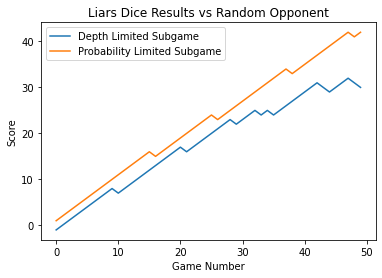

In [37]:
plt.plot(results2.cumsum(), label = 'Depth Limited Subgame')
plt.plot(results1.cumsum(), label = 'Probability Limited Subgame')
plt.title('Liars Dice Results vs Random Opponent')
plt.legend()
plt.xlabel('Game Number')
plt.ylabel('Score')

scores
-40/50
-46/50

In [40]:
scores = rebelVsrebel(game, v_net, 25)

  0%|                                                                                           | 0/25 [00:00<?, ?it/s]

[1.63636320e-001 1.56955877e-001 1.48098111e-001 1.37251054e-001
 1.22323582e-001 1.44147387e-001 7.77343213e-002 4.98533475e-002
 3.51192495e-101 3.51192495e-101 3.51192495e-101 3.51192495e-101
 3.51192495e-101 3.51192495e-101 3.51192495e-101 3.51192495e-101
 3.51192495e-101 3.51192495e-101 0.00000000e+000]
[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 1.76366179e-001 1.45088501e-001 1.96335213e-001 2.15509182e-001
 3.62860721e-100 1.42540274e-001 1.24160651e-001 3.62860721e-100
 3.62860721e-100 3.62860721e-100 3.62860721e-100 3.62860721e-100
 3.62860721e-100 3.62860721e-100 3.62860721e-100]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 7.53284361e-01 2.46715639e-01
 4.70870512e-99 4.70870512e-99 4.70870512e-99 4.70870512e-99
 4.70870512e-99 4.70870512e-99 4.70870512e-99 4.70870512e-99
 4.70870512e-99 4.70870512e-99 4.70870512e-99]
rebuilding subgame
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.000000

  4%|███▎                                                                              | 1/25 [01:48<43:19, 108.31s/it]

q,f=5,1
matches = 3, 2
0
Final State - ('root', 10, 13, 18)
winner - 1
current Record - 2
[8.93427198e-002 8.93703820e-002 8.94907667e-002 8.95644690e-002
 9.01556239e-002 8.87935845e-002 9.13423110e-002 9.85320226e-002
 4.42005429e-002 5.63133573e-002 8.44087737e-002 3.01701134e-101
 3.01701134e-101 7.57006809e-002 3.01701134e-101 3.01701134e-101
 1.27847655e-002 3.01701134e-101 0.00000000e+000]
[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 5.06710544e-001
 7.70833955e-100 7.70833955e-100 4.64482546e-001 7.70833955e-100
 7.70833955e-100 2.88069104e-002 7.70833955e-100 7.70833955e-100
 7.70833955e-100 7.70833955e-100 7.70833955e-100]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.66013696e-99 4.51951795e-01 4.80140030e-01 1.66013696e-99
 2.07658436e-02 4.71423313e-02 1.66013696e-99 1.66013696e-99
 1.66013696e-99 1.66013696e-99 1.66013696e-99]

  8%|██████▋                                                                            | 2/25 [02:56<36:51, 96.16s/it]

q,f=4,1
matches = 3, 2
0
Final State - ('root', 1, 4, 6, 10, 18)
winner - 1
current Record - 2
[1.60044373e-001 1.54263784e-001 1.45129487e-001 1.35307198e-001
 1.19009000e-001 2.59154693e-101 8.24622317e-002 3.87023581e-002
 2.59154693e-101 2.59154693e-101 1.65081567e-001 2.59154693e-101
 2.59154693e-101 2.59154693e-101 2.59154693e-101 2.59154693e-101
 2.59154693e-101 2.59154693e-101 0.00000000e+000]
[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 8.77308309e-100
 8.77308309e-100 8.77308309e-100 8.77308309e-100 8.77308309e-100
 8.77308309e-100 8.77308309e-100 1.00000000e+000]
rebuilding subgame
q,f=4,1
matches = 2, 0
1
Final State - ('root', 10, 18)
winner - -1
current Record - 1
[1.22335585e-001 1.22353681e-001 1.21421805e-001 1.26496394e-001
 1.32113336e-001 3.70799373e-101 1.87080365e-001 4.31108890e-002
 3.70799373e-101 1.45087945e-001 3.70799373e-101 

 12%|█████████▉                                                                         | 3/25 [04:01<31:50, 86.83s/it]

q,f=4,0
matches = 1, 3
1
Final State - ('root', 9, 18)
winner - -1
current Record - 0
[3.71512865e-002 3.79025132e-002 3.88591351e-002 4.00908102e-002
 4.16928866e-002 4.38004953e-002 4.66310071e-002 4.98160744e-002
 4.90299283e-002 6.16278002e-002 6.43412551e-002 5.38386697e-002
 9.38110042e-002 8.41789798e-002 7.00947405e-002 1.52165106e-001
 3.49683080e-002 1.03496831e-100 0.00000000e+000]
[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 1.42189945e-001 1.25855758e-001 1.58760205e-001 1.70181817e-001
 3.64926742e-100 1.32954256e-001 1.92598045e-001 3.64926742e-100
 7.74599740e-002 3.64926742e-100 3.64926742e-100 3.64926742e-100
 3.64926742e-100 3.64926742e-100 3.64926742e-100]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.81511168e-01
 6.34247109e-02 1.61844200e-01 1.66003602e-01 3.51890916e-02
 9.73441293e-02 9.89761445e-02 4.42794199e-02 5.28278113e-02
 5.76484952e-02 4.09512270e-02 1.83033530e-99]
reb

 16%|█████████████▎                                                                     | 4/25 [05:18<29:26, 84.12s/it]

q,f=5,0
matches = 3, 2
0
Final State - ('root', 10, 12, 18)
winner - 1
current Record - 0
[8.49414239e-002 8.48375597e-002 8.47498525e-002 8.45667736e-002
 8.43995128e-002 8.47882446e-002 8.38075112e-002 8.39602024e-002
 8.52657481e-002 8.19971560e-002 8.21688616e-002 3.14391464e-101
 3.14391464e-101 6.95099410e-002 3.14391464e-101 3.14391464e-101
 5.00721284e-003 3.14391464e-101 0.00000000e+000]
[0.00000000e+000 0.00000000e+000 1.92340492e-001 2.12285937e-001
 2.48327417e-001 6.28129459e-100 6.28129459e-100 1.62007420e-001
 6.28129459e-100 6.28129459e-100 9.07380397e-002 6.28129459e-100
 6.28129459e-100 9.43006941e-002 6.28129459e-100 6.28129459e-100
 6.28129459e-100 6.28129459e-100 6.28129459e-100]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 8.84330465e-02
 2.40453297e-01 2.55676033e-01 9.31139472e-02 1.07026924e-01
 1.26523059e-01 8.87736929e-02 2.59243267e-99]

 20%|████████████████▌                                                                  | 5/25 [06:32<26:56, 80.81s/it]

q,f=3,0
matches = 2, 0
0
Final State - ('root', 2, 6, 18)
winner - -1
current Record - -2
[1.63616498e-001 1.56943282e-001 1.48093872e-001 1.37255872e-001
 1.22333125e-001 1.44147766e-001 7.77509921e-002 4.98585932e-002
 3.51185092e-101 3.51185092e-101 3.51185092e-101 3.51185092e-101
 3.51185092e-101 3.51185092e-101 3.51185092e-101 3.51185092e-101
 3.51185092e-101 3.51185092e-101 0.00000000e+000]
[0.00000000e+000 0.00000000e+000 0.00000000e+000 1.30037087e-001
 1.50786044e-001 4.93189039e-100 1.96462914e-001 2.55427844e-001
 4.93189039e-100 2.67286111e-001 4.93189039e-100 4.93189039e-100
 4.93189039e-100 4.93189039e-100 4.93189039e-100 4.93189039e-100
 4.93189039e-100 4.93189039e-100 4.93189039e-100]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 8.44816444e-02 6.62340544e-01 1.96746349e-01
 2.79308182e-99 2.79308182e-99 5.64314629e-02 2.79308182e-99
 2.79308182e-99 2.79308182e-99 2.79308182e-99 2.79308182e-99
 2.79308182e-99 2.79308182e-99 2.79308182e-99]

 24%|███████████████████▉                                                               | 6/25 [08:17<27:56, 88.26s/it]

q,f=5,1
matches = 3, 1
0
Final State - ('root', 2, 4, 6, 13, 18)
winner - -1
current Record - -4
[1.63035197e-001 1.58594108e-001 1.51585840e-001 1.44874999e-001
 1.33450741e-001 2.51450318e-101 1.03536404e-001 1.00027605e-001
 2.51450318e-101 4.48951049e-002 2.51450318e-101 2.51450318e-101
 2.51450318e-101 2.51450318e-101 2.51450318e-101 2.51450318e-101
 2.51450318e-101 2.51450318e-101 0.00000000e+000]
[0.00000000e+000 0.00000000e+000 1.21735058e-001 1.26839628e-001
 1.34988686e-001 5.17070898e-100 1.46231052e-001 1.79344920e-001
 5.17070898e-100 5.17070898e-100 2.90860656e-001 5.17070898e-100
 5.17070898e-100 5.17070898e-100 5.17070898e-100 5.17070898e-100
 5.17070898e-100 5.17070898e-100 5.17070898e-100]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.79692200e-01 2.52786732e-99 5.25559569e-01 1.94748231e-01
 2.52786732e-99 2.52786732e-99 2.52786732e-99 2.52786732e-99
 2.52786732e-99 2.52786732e-99 2.52786732e-99 2.52786732e-99
 2.52786732e-99 2.52786732e-99 2.527867

 28%|███████████████████████▏                                                           | 7/25 [09:06<22:55, 76.43s/it]

q,f=4,0
matches = 2, 1
0
Final State - ('root', 3, 9, 18)
winner - -1
current Record - -4
[1.21341783e-001 1.18761038e-001 1.15503260e-001 1.11555466e-001
 1.06185398e-001 1.14385623e-001 8.84426635e-002 7.06897463e-002
 9.95240318e-002 5.36109915e-002 3.44990606e-101 3.44990606e-101
 3.44990606e-101 3.44990606e-101 3.44990606e-101 3.44990606e-101
 3.44990606e-101 3.44990606e-101 0.00000000e+000]
[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 2.11187174e-001 1.50488691e-001 2.45777907e-001 2.57412061e-001
 6.79307193e-100 1.09518616e-001 6.79307193e-100 6.79307193e-100
 2.56155504e-002 6.79307193e-100 6.79307193e-100 6.79307193e-100
 6.79307193e-100 6.79307193e-100 6.79307193e-100]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.18251029e-01 4.62984690e-01 2.36574522e-01
 2.18009593e-99 7.97181412e-02 1.02471618e-01 2.18009593e-99
 2.18009593e-99 2.18009593e-99 2.18009593e-99 2.18009593e-99
 2.18009593e-99 2.18009593e-99 2.18009593e-99]

 32%|██████████████████████████▌                                                        | 8/25 [10:41<23:12, 81.93s/it]

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.10541448e-99 1.00000000e+00]
rebuilding subgame
q,f=6,1
matches = 3, 1
0
Final State - ('root', 7, 9, 15, 16, 18)
winner - -1
current Record - -4
[1.23007720e-001 1.20191865e-001 1.16615234e-001 1.12292924e-001
 1.06403066e-001 1.15474361e-001 8.72950309e-002 6.84836651e-002
 9.94861836e-002 5.07499501e-002 3.46027496e-101 3.46027496e-101
 3.46027496e-101 3.46027496e-101 3.46027496e-101 3.46027496e-101
 3.46027496e-101 3.46027496e-101 0.00000000e+000]
[0.00000000e+000 0.00000000e+000 1.26918111e-001 1.46430961e-001
 1.70648332e-001 4.37459724e-100 1.83300741e-001 1.25503758e-001
 4.37459724e-100 4.37459724e-100 2.47198097e-001 4.37459724e-100
 4.37459724e-100 4.37459724e-100 4.37459724e-100 4.37459724e-100
 4.37459724e-100 4.374

 36%|█████████████████████████████▉                                                     | 9/25 [12:17<22:59, 86.25s/it]

q,f=5,2
matches = 2, 0
0
Final State - ('root', 10, 14, 18)
winner - -1
current Record - -4
[1.70939951e-001 1.64014586e-001 1.54767062e-001 1.43503601e-001
 1.26808517e-001 1.46560267e-001 5.75870504e-002 3.92607026e-003
 2.84139426e-101 2.84139426e-101 3.18928955e-002 2.84139426e-101
 2.84139426e-101 2.84139426e-101 2.84139426e-101 2.84139426e-101
 2.84139426e-101 2.84139426e-101 0.00000000e+000]
[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 2.07747063e-001
 1.89904380e-001 1.88158227e-001 1.81153360e-001 7.40463914e-100
 4.64481530e-002 1.86588817e-001 7.40463914e-100 7.40463914e-100
 7.40463914e-100 7.40463914e-100 7.40463914e-100]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.00000000e+00 4.22528201e-99
 4.22528201e-99 4.22528201e-99 4.22528201e-99 4.22528201e-99
 4.22528201e-99 4.22528201e-99 4.22528201e-9

 40%|████████████████████████████████▊                                                 | 10/25 [13:14<19:23, 77.54s/it]

q,f=4,2
matches = 1, 2
1
Final State - ('root', 2, 5, 8, 10, 11, 18)
winner - 1
current Record - -4
[9.75022444e-002 9.77939231e-002 9.75307824e-002 9.89751052e-002
 1.00628609e-001 8.60671398e-002 9.90033941e-002 1.09256826e-001
 4.24707169e-002 6.31997880e-002 1.07571472e-001 2.33344169e-101
 2.33344169e-101 2.33344169e-101 2.33344169e-101 2.33344169e-101
 2.33344169e-101 2.33344169e-101 0.00000000e+000]
[0.00000000e+000 7.65555043e-002 8.09904364e-002 8.70452192e-002
 9.58693174e-002 8.00869574e-002 1.14432883e-001 1.25980894e-001
 4.73625900e-100 8.77297335e-002 2.51309055e-001 4.73625900e-100
 4.73625900e-100 4.73625900e-100 4.73625900e-100 4.73625900e-100
 4.73625900e-100 4.73625900e-100 4.73625900e-100]
[0.00000000e+00 0.00000000e+00 1.77732020e-01 1.84750891e-01
 1.39473086e-01 7.45155998e-02 1.54163375e-01 1.34155634e-01
 1.68051136e-99 6.03307160e-02 7.48786791e-02 1.68051136e-99
 1.68051136e-99 1.68051136e-99 1.68051136e-99 1.68051136e-99
 1.68051136e-99 1.68051136e-99 1.680

 44%|████████████████████████████████████                                              | 11/25 [14:08<16:25, 70.36s/it]

q,f=2,2
matches = 0, 1
1
Final State - ('root', 5, 18)
winner - 1
current Record - -4
[1.53892412e-001 1.49037364e-001 1.42651618e-001 1.34631559e-001
 1.23058038e-001 1.35776198e-001 7.50533245e-002 3.06033443e-002
 2.69186240e-101 2.69186240e-101 5.52961417e-002 2.69186240e-101
 2.69186240e-101 2.69186240e-101 2.69186240e-101 2.69186240e-101
 2.69186240e-101 2.69186240e-101 0.00000000e+000]
[0.00000000e+000 7.72918613e-002 7.70167573e-002 7.68988411e-002
 7.67045020e-002 7.62409978e-002 7.61870098e-002 7.61076976e-002
 7.59967692e-002 7.57659383e-002 7.66135109e-002 7.67291778e-002
 7.76356917e-002 8.08112451e-002 8.08379561e-100 8.08379561e-100
 8.08379561e-100 8.08379561e-100 8.08379561e-100]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 4.43647642e-01 4.71256704e-01 1.07659426e-99
 3.65734166e-02 4.85222376e-02 1.07659426e-99 1.07659426e-99
 1.07659426e-99 1.07659426e-99 1.07659426e-99]
reb

 48%|███████████████████████████████████████▎                                          | 12/25 [14:32<12:15, 56.60s/it]

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.44471905e-98 1.00000000e+00
 1.44471905e-98 1.44471905e-98 1.44471905e-98]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.97012691e-97 1.97012691e-97 1.00000000e+00]
rebuilding subgame
q,f=6,0
matches = 2, 3
1
Final State - ('root', 8, 9, 12, 13, 15, 18)
winner - 1
current Record - -4
[1.70960358e-001 1.63287991e-001 1.51153378e-001 1.37829836e-001
 1.15026071e-001 2.65581626e-101 7.22011358e-002 1.89491741e-002
 2.65581626e-101 2.65581626e-101 1.70592055e-001 2.65581626e-101
 2.65581626e-101 2.65581626e-101 2.65581626e-101 2.65581626e-101
 2.65581626e-101 2.65581626e-101 0.000

 52%|██████████████████████████████████████████▋                                       | 13/25 [15:26<11:07, 55.63s/it]

q,f=6,1
matches = 2, 2
0
Final State - ('root', 4, 7, 13, 16, 18)
winner - -1
current Record - -4
[1.16965073e-001 1.15665414e-001 1.14043607e-001 1.11800081e-001
 1.08643134e-001 1.09248276e-001 9.51290468e-002 8.08597453e-002
 2.43211931e-101 6.16163424e-002 8.60292806e-002 2.43211931e-101
 2.43211931e-101 2.43211931e-101 2.43211931e-101 2.43211931e-101
 2.43211931e-101 2.43211931e-101 0.00000000e+000]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 5.14691626e-01 1.06925663e-99
 4.85308374e-01 1.06925663e-99 1.06925663e-99 1.06925663e-99
 1.06925663e-99 1.06925663e-99 1.06925663e-99]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.32060355e-99
 4.23965625e-01 5.76034375e-01 3.32060355e-99 3.32060355e-99
 3.32060355e-99 3.32060355e-99 3.32060355e-99]
rebuilding

 56%|█████████████████████████████████████████████▉                                    | 14/25 [17:06<12:37, 68.90s/it]

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.36448496e-99
 6.11637863e-02 2.12412477e-02 1.36448496e-99 1.36448496e-99
 1.36448496e-99 1.36448496e-99 9.17594966e-01]
rebuilding subgame
q,f=4,1
matches = 2, 2
1
Final State - ('root', 4, 9, 10, 18)
winner - -1
current Record - -4
[0.05555556 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556
 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556
 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556
 0.        ]
[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 9.82534801e-002 9.87952248e-100 9.87952248e-100
 9.87952248e-100 9.87952248e-100 9.01746520e-001]
rebuilding subgame
q,f=5,0
matches = 1, 1
1
Final State - ('root', 12, 1

 60%|█████████████████████████████████████████████████▏                                | 15/25 [18:23<11:54, 71.49s/it]

q,f=3,2
matches = 1, 1
0
Final State - ('root', 5, 6, 7, 8, 18)
winner - -1
current Record - -6
[1.34917645e-001 1.32290647e-001 1.28978652e-001 1.25136486e-001
 1.20026896e-001 1.27766530e-001 1.00813294e-001 1.01509560e-001
 3.22731397e-101 2.85602895e-002 3.22731397e-101 3.22731397e-101
 3.22731397e-101 3.22731397e-101 3.22731397e-101 3.22731397e-101
 3.22731397e-101 3.22731397e-101 0.00000000e+000]
[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 5.84296665e-100 4.08703186e-001 3.37382507e-001
 5.84296665e-100 5.84296665e-100 1.95869436e-001 5.84296665e-100
 5.84296665e-100 5.80448709e-002 5.84296665e-100 5.84296665e-100
 5.84296665e-100 5.84296665e-100 5.84296665e-100]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.72923844e-99
 2.72923844e-99 2.72923844e-99 2.72923844e-99 2.72923844e-99
 2.72923844e-99 2.72923844e-99 1.0000000

 64%|████████████████████████████████████████████████████▍                             | 16/25 [19:49<11:21, 75.67s/it]

q,f=4,1
matches = 1, 2
1
Final State - ('root', 10, 18)
winner - 1
current Record - -4
[0.05555556 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556
 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556
 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556
 0.        ]
[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 2.14401255e-001 4.97983504e-100 2.28563817e-001 1.89348035e-001
 4.97983504e-100 4.97983504e-100 3.11488589e-001 4.97983504e-100
 4.97983504e-100 5.61983046e-002 4.97983504e-100 4.97983504e-100
 4.97983504e-100 4.97983504e-100 4.97983504e-100]
[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.125
 0.125 0.125 0.125 0.125 0.125 0.125 0.125]
rebuilding subgame
q,f=4,1
matches = 1, 2
0
Final State - ('root', 3, 10, 18)
winner - 1
current Record - -3
[1.00066851e-001 1.18439485e-001 1.01767429e-001 9.99198666e-002
 9.33957923e-002 3.62594647e-101 7.30595163e-002 8.51497366e-002
 3.62594647e-101 3.62594647e-101 

 68%|███████████████████████████████████████████████████████▊                          | 17/25 [20:57<09:48, 73.58s/it]

q,f=4,1
matches = 1, 2
1
Final State - ('root', 10, 18)
winner - 1
current Record - -2
[1.46948637e-001 1.43457355e-001 1.39026937e-001 1.33507609e-001
 1.26523813e-001 1.35622058e-001 9.82373850e-002 7.66762068e-002
 3.42084440e-101 3.42084440e-101 3.42084440e-101 3.42084440e-101
 3.42084440e-101 3.42084440e-101 3.42084440e-101 3.42084440e-101
 3.42084440e-101 3.42084440e-101 0.00000000e+000]
[0.00000000e+000 1.42428318e-001 1.50545829e-001 1.71610300e-001
 2.10246154e-001 5.81143574e-100 5.81143574e-100 1.42074525e-001
 5.81143574e-100 5.81143574e-100 8.72952292e-002 5.81143574e-100
 5.81143574e-100 9.57996446e-002 5.81143574e-100 5.81143574e-100
 5.81143574e-100 5.81143574e-100 5.81143574e-100]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 6.59816269e-02 5.62722103e-01 2.98618529e-01
 2.96881691e-99 2.11477955e-02 5.15299452e-02 2.96881691e-99
 2.96881691e-99 2.96881691e-99 2.96881691e-99 2.96881691e-99
 2.96881691e-99 2.96881691e-99 2.96881691e-99]
re

 72%|███████████████████████████████████████████████████████████                       | 18/25 [21:44<07:38, 65.53s/it]

q,f=6,1
matches = 3, 3
0
Final State - ('root', 7, 10, 13, 16, 18)
winner - 1
current Record - -2
[1.44887854e-001 1.41769482e-001 1.37845683e-001 1.32946178e-001
 1.26688138e-001 1.34212639e-001 1.00668592e-001 8.09814338e-002
 3.41153556e-101 3.41153556e-101 3.41153556e-101 3.41153556e-101
 3.41153556e-101 3.41153556e-101 3.41153556e-101 3.41153556e-101
 3.41153556e-101 3.41153556e-101 0.00000000e+000]
[0.00000000e+000 0.00000000e+000 9.60401671e-002 1.04022162e-001
 1.14665642e-001 9.46027306e-002 1.34998776e-001 1.49224171e-001
 3.78983091e-100 1.00642458e-001 2.05803893e-001 3.78983091e-100
 3.78983091e-100 3.78983091e-100 3.78983091e-100 3.78983091e-100
 3.78983091e-100 3.78983091e-100 3.78983091e-100]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.97212220e-99 4.12973475e-01 5.87026525e-01 2.97212220e-99
 2.97212220e-99 2.97212220e-99 2.97212220e-99 2.97212220e-99
 2.97212220e-99 2.97212220e-99 2.97212

 76%|██████████████████████████████████████████████████████████████▎                   | 19/25 [23:06<07:02, 70.40s/it]

q,f=6,1
matches = 3, 2
0
Final State - ('root', 10, 16, 18)
winner - -1
current Record - -2
[4.36275121e-002 4.44122187e-002 4.54303896e-002 4.67640973e-002
 4.85241751e-002 4.69294501e-002 5.31425328e-002 5.73245371e-002
 4.69550012e-002 6.33080984e-002 7.28418524e-002 5.31392407e-002
 7.52415022e-002 9.39133448e-002 7.90655838e-002 8.66098945e-002
 4.27705690e-002 1.04277057e-100 0.00000000e+000]
[0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 1.549448e-99 1.549448e-99 1.549448e-99 1.000000e+00]
rebuilding subgame
q,f=5,2
matches = 1, 0
1
Final State - ('root', 14, 18)
winner - -1
current Record - -3
[1.45809434e-001 1.40578238e-001 1.31912730e-001 1.24652360e-001
 1.14887411e-001 3.24414258e-101 7.71303671e-002 7.47117844e-002
 3.24414258e-101 3.24414258e-101 1.90317675e-001 3.24414258e-101
 3.24414258e-101 3.24414258e-101 3.24414258e

 80%|█████████████████████████████████████████████████████████████████▌                | 20/25 [23:45<05:05, 61.07s/it]

q,f=2,2
matches = 1, 0
0
Final State - ('root', 3, 5, 18)
winner - -1
current Record - -4
[1.20274516e-001 1.18710421e-001 1.16743751e-001 1.14054902e-001
 1.10239287e-001 1.11716928e-001 9.38908290e-002 7.66697707e-002
 2.44615798e-101 5.49598502e-002 8.27397442e-002 2.44615798e-101
 2.44615798e-101 2.44615798e-101 2.44615798e-101 2.44615798e-101
 2.44615798e-101 2.44615798e-101 0.00000000e+000]
[0.00000000e+000 8.43434121e-002 8.62556399e-002 8.88347629e-002
 9.29330569e-002 8.60090311e-002 1.01543261e-001 1.06707908e-001
 4.26595333e-100 9.05735428e-002 1.59122272e-001 4.26595333e-100
 5.95407814e-002 4.41363316e-002 4.26595333e-100 4.26595333e-100
 4.26595333e-100 4.26595333e-100 4.26595333e-100]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.82530957e-02 5.42432388e-01 3.89213249e-01
 2.91631882e-99 1.22766122e-02 2.78246550e-02 2.91631882e-99
 2.91631882e-99 2.91631882e-99 2.91631882e-99 2.91631882e-99
 2.91631882e-99 2.91631882e-99 2.91631882e-99]

 84%|████████████████████████████████████████████████████████████████████▉             | 21/25 [24:34<03:50, 57.51s/it]

q,f=4,1
matches = 2, 2
0
Final State - ('root', 6, 7, 9, 10, 18)
winner - 1
current Record - -2
[1.50290675e-001 1.45817287e-001 1.39954134e-001 1.32562346e-001
 1.21935503e-001 1.33399674e-001 7.75836379e-002 3.53679987e-002
 2.66498036e-101 2.66498036e-101 6.30887439e-002 2.66498036e-101
 2.66498036e-101 2.66498036e-101 2.66498036e-101 2.66498036e-101
 2.66498036e-101 2.66498036e-101 0.00000000e+000]
[0.00000000e+000 0.00000000e+000 7.48668192e-002 9.65217588e-002
 1.26307613e-001 4.49410892e-100 1.83835460e-001 2.62402689e-001
 4.49410892e-100 2.56065660e-001 4.49410892e-100 4.49410892e-100
 4.49410892e-100 4.49410892e-100 4.49410892e-100 4.49410892e-100
 4.49410892e-100 4.49410892e-100 4.49410892e-100]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.00000000e+00 7.40466074e-99
 7.40466074e-99 7.40466074e-99 7.40466074e-99 7.40466074e-99
 7.40466074e-99 7.40466074e-99 7.4046607

 88%|████████████████████████████████████████████████████████████████████████▏         | 22/25 [26:09<03:26, 68.73s/it]

q,f=5,2
matches = 1, 0
0
Final State - ('root', 7, 9, 12, 14, 18)
winner - -1
current Record - -4
[8.55066266e-002 8.54306682e-002 8.53737616e-002 8.52324918e-002
 8.51109727e-002 8.55411700e-002 8.48225464e-002 8.47080321e-002
 8.61173918e-002 8.33742935e-002 8.77240491e-002 3.07156127e-101
 6.10579962e-002 3.07156127e-101 3.07156127e-101 3.07156127e-101
 3.07156127e-101 3.07156127e-101 0.00000000e+000]
[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 9.04915627e-100 9.04915627e-100
 9.04915627e-100 9.04915627e-100 9.04915627e-100 9.04915627e-100
 9.04915627e-100 9.04915627e-100 1.00000000e+000]
rebuilding subgame
q,f=4,0
matches = 3, 0
1
Final State - ('root', 9, 18)
winner - -1
current Record - -5
[5.29145138e-002 5.36023437e-002 5.16142226e-002 5.22609088e-002
 5.57593589e-002 4.72927261e-002 4.73271844e-002 6.02771224e-002
 4.18567494e-002 3.86608986e-002 7.11349404e-0

 92%|███████████████████████████████████████████████████████████████████████████▍      | 23/25 [26:25<01:45, 52.90s/it]

q,f=4,0
matches = 3, 0
0
Final State - ('root', 7, 9, 18)
winner - -1
current Record - -6
[1.57405257e-001 1.52161388e-001 1.45240016e-001 1.36592081e-001
 1.24053914e-001 1.38072356e-001 7.22405411e-002 2.56897092e-002
 2.72008136e-101 2.72008136e-101 4.85447370e-002 2.72008136e-101
 2.72008136e-101 2.72008136e-101 2.72008136e-101 2.72008136e-101
 2.72008136e-101 2.72008136e-101 0.00000000e+000]
[0.00000000e+000 7.83200260e-002 9.17570319e-002 1.14750810e-001
 1.43885103e-001 5.13155279e-100 1.59642635e-001 9.40620120e-002
 5.13155279e-100 5.13155279e-100 3.17582383e-001 5.13155279e-100
 5.13155279e-100 5.13155279e-100 5.13155279e-100 5.13155279e-100
 5.13155279e-100 5.13155279e-100 5.13155279e-100]
[0.00000000e+00 0.00000000e+00 3.92440846e-01 5.17974606e-01
 2.49724540e-02 2.75784645e-99 4.59332611e-02 1.86788335e-02
 2.75784645e-99 2.75784645e-99 2.75784645e-99 2.75784645e-99
 2.75784645e-99 2.75784645e-99 2.75784645e-99 2.75784645e-99
 2.75784645e-99 2.75784645e-99 2.75784645e-99]

 96%|██████████████████████████████████████████████████████████████████████████████▋   | 24/25 [28:23<01:12, 72.28s/it]

q,f=5,0
matches = 2, 1
0
Final State - ('root', 10, 12, 18)
winner - -1
current Record - -8
[1.50304584e-001 1.45831780e-001 1.39967728e-001 1.32574825e-001
 1.21945022e-001 1.33406208e-001 7.75714874e-002 3.53505869e-002
 2.66508146e-101 2.66508146e-101 6.30477785e-002 2.66508146e-101
 2.66508146e-101 2.66508146e-101 2.66508146e-101 2.66508146e-101
 2.66508146e-101 2.66508146e-101 0.00000000e+000]
[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 1.59456766e-001 1.62532537e-001
 1.42776360e-001 1.48123343e-001 1.61098259e-001 5.36635326e-100
 1.33787523e-001 9.22252122e-002 5.36635326e-100 5.36635326e-100
 5.36635326e-100 5.36635326e-100 5.36635326e-100]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.00000000e+00 5.23557539e-99
 5.23557539e-99 5.23557539e-99 5.23557539e-99 5.23557539e-99
 5.23557539e-99 5.23557539e-99 5.23557539e-9

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [29:50<00:00, 71.62s/it]

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.33676914e-98 1.00000000e+00]
rebuilding subgame
q,f=6,1
matches = 2, 2
0
Final State - ('root', 6, 7, 8, 9, 10, 16, 18)
winner - -1
current Record - -8


final score 29 - 21

Text(0, 0.5, 'Match Score')

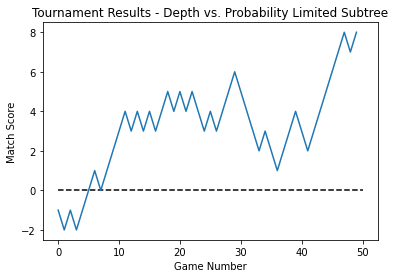

In [49]:
plt.plot(-1*scores.cumsum())
plt.hlines(0, 0,50, linestyles='dashed', label = 'Tied Score')
plt.title('Tournament Results - Depth vs. Probability Limited Subtree')
plt.xlabel('Game Number')
plt.ylabel('Match Score')

dcfr / linear update = True

In [53]:
results3 = run_tournament(players, game, v_net, 50, 4, 1500)


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

[8.06295355e-01 1.24177125e-99 1.24177125e-99 1.93704645e-01
 1.24177125e-99 1.24177125e-99 1.24177125e-99 1.24177125e-99
 1.24177125e-99 1.24177125e-99 1.24177125e-99 1.24177125e-99
 1.24177125e-99 1.24177125e-99 1.24177125e-99 1.24177125e-99
 1.24177125e-99 1.24177125e-99 0.00000000e+00]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.60002634e-98 1.60002634e-98 1.00000000e+00 1.60002634e-98
 1.60002634e-98 1.60002634e-98 1.60002634e-98 1.60002634e-98
 1.60002634e-98 1.60002634e-98 1.60002634e-98 1.60002634e-98
 1.60002634e-98 1.60002634e-98 1.60002634e-98]
rebuilding subgame
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.00210581 0.00210581 0.00210581 0.00210581 0.00210581 0.00210581
 0.98736513]
rebuilding subgame


  2%|█▋                                                                                 | 1/50 [00:59<48:45, 59.70s/it]

q,f=4,2
matches = 2, 1
0
Final State - ('root', 0, 3, 6, 11, 18)
winner - 1
current Record - 1
[7.67145821e-002 6.58288784e-002 4.53435511e-002 4.41517389e-002
 1.91320033e-100 1.91320033e-100 1.91320033e-100 1.91320033e-100
 1.91320033e-100 1.91320033e-100 7.67961249e-001 1.91320033e-100
 1.91320033e-100 1.91320033e-100 1.91320033e-100 1.91320033e-100
 1.91320033e-100 1.91320033e-100 0.00000000e+000]
[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 3.5879218e-99 3.5879218e-99
 3.5879218e-99 3.5879218e-99 3.5879218e-99 1.0000000e+00]
rebuilding subgame


  4%|███▎                                                                               | 2/50 [01:17<37:40, 47.10s/it]

q,f=5,0
matches = 1, 3
0
Final State - ('root', 10, 12, 18)
winner - 1
current Record - 2
[1.98605271e-001 1.39247426e-001 1.60733050e-001 1.64280519e-001
 1.38184565e-001 1.09034685e-100 1.27282312e-001 2.53743956e-002
 1.09034685e-100 4.62924607e-002 1.09034685e-100 1.09034685e-100
 1.09034685e-100 1.09034685e-100 1.09034685e-100 1.09034685e-100
 1.09034685e-100 1.09034685e-100 0.00000000e+000]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 8.98060123e-99 8.98060123e-99 8.98060123e-99 8.98060123e-99
 8.98060123e-99 8.98060123e-99 1.00000000e+00]
rebuilding subgame


  6%|████▉                                                                              | 3/50 [01:37<30:34, 39.03s/it]

q,f=4,2
matches = 0, 3
0
Final State - ('root', 4, 11, 18)
winner - 1
current Record - 3
[5.09155051e-002 5.12308437e-002 5.16770734e-002 5.19357920e-002
 5.31644940e-002 5.04390922e-002 5.17615105e-002 5.80247776e-002
 4.45440663e-002 4.50403798e-002 6.97380446e-002 3.65655235e-002
 3.02160444e-002 9.80314186e-002 3.03319025e-002 1.78990856e-002
 2.08484446e-001 1.05255097e-100 0.00000000e+000]
[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 4.80095535e-100 4.80095535e-100 1.00000000e+000]
rebuilding subgame


  8%|██████▋                                                                            | 4/50 [01:41<21:49, 28.47s/it]

q,f=6,0
matches = 1, 2
0
Final State - ('root', 13, 15, 18)
winner - 1
current Record - 4
[1.08901082e-001 1.07321791e-001 1.05056557e-001 1.02489432e-001
 9.89827639e-002 9.75829161e-002 8.82428267e-002 7.92347217e-002
 8.75992006e-002 6.28675331e-002 6.17211754e-002 7.07391744e-101
 7.07391744e-101 7.07391744e-101 7.07391744e-101 7.07391744e-101
 7.07391744e-101 7.07391744e-101 0.00000000e+000]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.58149973e-99
 3.58149973e-99 3.58149973e-99 1.00000000e+00]
rebuilding subgame


 10%|████████▎                                                                          | 5/50 [01:49<16:46, 22.36s/it]

q,f=5,2
matches = 2, 1
0
Final State - ('root', 6, 14, 18)
winner - 1
current Record - 5
[5.7128793e-100 5.7128793e-100 5.7128793e-100 5.7128793e-100
 5.7128793e-100 5.7128793e-100 5.7128793e-100 5.7128793e-100
 5.7128793e-100 5.7128793e-100 1.0000000e+000 5.7128793e-100
 5.7128793e-100 5.7128793e-100 5.7128793e-100 5.7128793e-100
 5.7128793e-100 5.7128793e-100 0.0000000e+000]
[0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 1.6e-98
 1.0e+00]
rebuilding subgame


 12%|█████████▉                                                                         | 6/50 [02:44<23:28, 32.00s/it]

q,f=6,1
matches = 2, 3
0
Final State - ('root', 10, 16, 18)
winner - 1
current Record - 6
[2.63863437e-001 1.89178989e-001 2.13299180e-001 3.21226570e-001
 1.24318249e-002 4.73334295e-100 4.73334295e-100 4.73334295e-100
 4.73334295e-100 4.73334295e-100 4.73334295e-100 4.73334295e-100
 4.73334295e-100 4.73334295e-100 4.73334295e-100 4.73334295e-100
 4.73334295e-100 4.73334295e-100 0.00000000e+000]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.65280659e-98 2.65280659e-98 2.65280659e-98 2.65280659e-98
 2.65280659e-98 2.65280659e-98 1.00000000e+00]
rebuilding subgame


 14%|███████████▌                                                                       | 7/50 [03:34<26:54, 37.55s/it]

q,f=4,2
matches = 0, 2
0
Final State - ('root', 3, 11, 18)
winner - 1
current Record - 7
[1.42371633e-001 1.59195291e-001 1.50800321e-001 1.70175920e-001
 4.98494551e-002 1.80432881e-001 6.63160880e-002 2.68478410e-100
 2.68478410e-100 2.68478410e-100 8.08584111e-002 2.68478410e-100
 2.68478410e-100 2.68478410e-100 2.68478410e-100 2.68478410e-100
 2.68478410e-100 2.68478410e-100 0.00000000e+000]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.46789651e-98 1.46789651e-98 1.00000000e+00
 1.46789651e-98 1.46789651e-98 1.46789651e-98]
rebuilding subgame
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.03122908
 0.96877092]
rebuilding subgame


 16%|█████████████▎                                                                     | 8/50 [04:15<26:54, 38.45s/it]

q,f=6,1
matches = 2, 1
0
Final State - ('root', 5, 12, 15, 16, 18)
winner - 1
current Record - 8
[6.40195764e-001 8.02250227e-100 8.02250227e-100 3.17509853e-001
 8.02250227e-100 4.22943828e-002 8.02250227e-100 8.02250227e-100
 8.02250227e-100 8.02250227e-100 8.02250227e-100 8.02250227e-100
 8.02250227e-100 8.02250227e-100 8.02250227e-100 8.02250227e-100
 8.02250227e-100 8.02250227e-100 0.00000000e+000]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.75817409e-02 2.92695037e-98 2.92695037e-98 1.15630569e-02
 2.92695037e-98 2.92695037e-98 9.60855202e-01]
rebuilding subgame


 18%|██████████████▉                                                                    | 9/50 [05:16<31:02, 45.44s/it]

q,f=4,2
matches = 1, 2
0
Final State - ('root', 0, 11, 18)
winner - 1
current Record - 9
[1.49133833e-001 1.47682667e-001 1.44599211e-001 1.25854140e-001
 1.11211241e-001 1.16143436e-001 1.03196108e-001 3.97045875e-003
 5.14914619e-002 4.67174436e-002 2.62974890e-100 2.62974890e-100
 2.62974890e-100 2.62974890e-100 2.62974890e-100 2.62974890e-100
 2.62974890e-100 2.62974890e-100 0.00000000e+000]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.37957293e-98 1.37957293e-98
 1.00000000e+00 1.37957293e-98 1.37957293e-98]
rebuilding subgame
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
rebuilding subgame


 20%|████████████████▍                                                                 | 10/50 [05:43<26:30, 39.75s/it]

q,f=6,2
matches = 2, 0
0
Final State - ('root', 0, 13, 16, 17, 18)
winner - 1
current Record - 10
[1.06912939e-001 1.05238522e-001 1.02693220e-001 1.01536713e-001
 9.98385396e-002 8.82205911e-002 9.04109456e-002 9.46471878e-002
 3.55649132e-002 1.10772852e-001 6.41635763e-002 3.35617775e-101
 3.35617775e-101 3.35617775e-101 3.35617775e-101 3.35617775e-101
 3.35617775e-101 3.35617775e-101 0.00000000e+000]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.04559214e-99
 1.04559214e-99 1.04559214e-99 1.04559214e-99 1.04559214e-99
 1.04559214e-99 1.04559214e-99 1.00000000e+00]
rebuilding subgame


 22%|██████████████████                                                                | 11/50 [05:53<20:00, 30.79s/it]

q,f=4,1
matches = 1, 3
0
Final State - ('root', 3, 10, 18)
winner - -1
current Record - 9
[2.54346363e-001 5.05923702e-002 7.78339060e-002 3.32731428e-001
 5.24104647e-100 2.84495933e-001 5.24104647e-100 5.24104647e-100
 5.24104647e-100 5.24104647e-100 5.24104647e-100 5.24104647e-100
 5.24104647e-100 5.24104647e-100 5.24104647e-100 5.24104647e-100
 5.24104647e-100 5.24104647e-100 0.00000000e+000]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.88518754e-02
 2.80298406e-98 2.80298406e-98 9.61148125e-01]
rebuilding subgame


 24%|███████████████████▋                                                              | 12/50 [06:54<25:17, 39.92s/it]

q,f=5,2
matches = 2, 2
0
Final State - ('root', 5, 14, 18)
winner - 1
current Record - 10


 26%|█████████████████████▎                                                            | 13/50 [07:19<21:56, 35.59s/it]

[1.03042270e-001 1.04583024e-001 1.04123136e-001 9.25577439e-002
 9.11056912e-002 1.04843766e-001 8.66066226e-002 8.75970030e-002
 6.94009854e-002 6.73699867e-002 8.87697721e-002 2.90791909e-101
 2.90791909e-101 2.90791909e-101 2.90791909e-101 2.90791909e-101
 2.90791909e-101 2.90791909e-101 0.00000000e+000]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 9.72422896e-01 4.32411196e-99
 4.32411196e-99 2.75771041e-02 4.32411196e-99 4.32411196e-99
 4.32411196e-99 4.32411196e-99 4.32411196e-99]
q,f=4,1
matches = 2, 2
1
Final State - ('root', 3, 9, 10, 18)
winner - 1
current Record - 11
[6.17429952e-001 6.12509684e-100 6.12509684e-100 3.82570048e-001
 6.12509684e-100 6.12509684e-100 6.12509684e-100 6.12509684e-100
 6.12509684e-100 6.12509684e-100 6.12509684e-100 6.12509684e-100
 6.12509684e-100 6.12509684e-100 6.12509684e-100 6.12509684e-100
 6.12509684e-100 6.12509684e-100 0.00000000e+0

 28%|██████████████████████▉                                                           | 14/50 [08:23<26:27, 44.11s/it]

q,f=6,0
matches = 2, 2
0
Final State - ('root', 0, 15, 18)
winner - 1
current Record - 12
[1.08954961e-001 1.10808844e-001 1.10811294e-001 9.90016631e-002
 9.37968216e-002 1.11765505e-001 8.65337205e-002 2.17579388e-002
 5.42118096e-002 3.84298542e-002 1.63927589e-001 4.28857686e-101
 4.28857686e-101 4.28857686e-101 4.28857686e-101 4.28857686e-101
 4.28857686e-101 4.28857686e-101 0.00000000e+000]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.41024077e-98 1.41024077e-98 1.00000000e+00]
rebuilding subgame


 30%|████████████████████████▌                                                         | 15/50 [09:01<24:35, 42.15s/it]

q,f=6,0
matches = 2, 1
0
Final State - ('root', 7, 15, 18)
winner - 1
current Record - 13


 32%|██████████████████████████▏                                                       | 16/50 [09:33<22:12, 39.21s/it]

[1.40343489e-001 1.56787875e-001 1.46975744e-001 1.61289667e-001
 5.04347602e-002 1.69644624e-001 6.85308081e-002 2.29614897e-100
 2.29614897e-100 2.29614897e-100 1.05993033e-001 2.29614897e-100
 2.29614897e-100 2.29614897e-100 2.29614897e-100 2.29614897e-100
 2.29614897e-100 2.29614897e-100 0.00000000e+000]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
rebuilding subgame
q,f=6,2
matches = 2, 2
0
Final State - ('root', 5, 17, 18)
winner - 1
current Record - 14
[1.29062319e-001 1.28214391e-001 1.26479733e-001 1.29124351e-001
 1.32701429e-001 9.58978294e-101 1.76977745e-001 5.22695380e-002
 9.58978294e-101 1.25170494e-001 9.58978294e-101 9.58978294e-101
 9.58978294e-101 9.58978294e-101 9.58978294e-101 9.58978294e-101
 9.58978294e-101 9.58978294e-101 0.00000000e+000]
[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 8.53035968e-100 8.53035968e-100
 5.29977736e-001 

 34%|███████████████████████████▉                                                      | 17/50 [09:50<17:54, 32.55s/it]

q,f=6,1
matches = 0, 1
0
Final State - ('root', 6, 9, 15, 16, 18)
winner - 1
current Record - 15
[6.85479582e-100 6.85479582e-100 6.85479582e-100 6.85479582e-100
 6.85479582e-100 6.85479582e-100 6.85479582e-100 6.85479582e-100
 6.85479582e-100 6.85479582e-100 1.00000000e+000 6.85479582e-100
 6.85479582e-100 6.85479582e-100 6.85479582e-100 6.85479582e-100
 6.85479582e-100 6.85479582e-100 0.00000000e+000]
[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 4.53058003e-100 4.53058003e-100
 4.53058003e-100 4.53058003e-100 1.00000000e+000]
rebuilding subgame


 36%|█████████████████████████████▌                                                    | 18/50 [10:51<21:48, 40.88s/it]

q,f=5,1
matches = 2, 2
0
Final State - ('root', 10, 13, 18)
winner - 1
current Record - 16
[2.33835550e-001 2.15620076e-001 2.08262346e-001 1.82556126e-001
 1.01072361e-001 2.16973983e-100 2.79733008e-002 3.06802385e-002
 2.16973983e-100 2.16973983e-100 2.16973983e-100 2.16973983e-100
 2.16973983e-100 2.16973983e-100 2.16973983e-100 2.16973983e-100
 2.16973983e-100 2.16973983e-100 0.00000000e+000]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 7.65205721e-99
 7.65205721e-99 7.65205721e-99 7.65205721e-99 7.65205721e-99
 7.65205721e-99 7.65205721e-99 1.00000000e+00]
rebuilding subgame


 38%|███████████████████████████████▏                                                  | 19/50 [11:25<20:05, 38.89s/it]

q,f=4,1
matches = 1, 3
0
Final State - ('root', 2, 10, 18)
winner - -1
current Record - 15


 40%|████████████████████████████████▊                                                 | 20/50 [11:29<14:10, 28.36s/it]

[5.42518923e-002 5.45750830e-002 5.50338086e-002 5.56813561e-002
 5.61679761e-002 5.38708206e-002 5.93761526e-002 5.70667165e-002
 4.81905284e-002 6.82208698e-002 5.16914423e-002 4.08401005e-002
 8.61572892e-002 4.03178149e-002 3.70041209e-002 1.25542815e-001
 5.60112129e-002 1.05601121e-100 0.00000000e+000]
q,f=5,1
matches = 1, 2
1
Final State - ('root', 13, 18)
winner - -1
current Record - 14
[1.48241906e-001 1.60511706e-001 1.54828397e-001 1.84570211e-001
 4.69895400e-002 1.97916208e-001 6.20920140e-002 3.13513489e-100
 3.13513489e-100 3.13513489e-100 4.48500171e-002 3.13513489e-100
 3.13513489e-100 3.13513489e-100 3.13513489e-100 3.13513489e-100
 3.13513489e-100 3.13513489e-100 0.00000000e+000]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 4.82045549e-01 5.22130032e-99
 2.39240904e-01 5.22130032e-99 5.22130032e-99 2.78713547e-01
 5.22130032e-99 5.22130032e-99 5.22130032e-99]
r

 42%|██████████████████████████████████▍                                               | 21/50 [12:17<16:38, 34.42s/it]

q,f=5,2
matches = 2, 1
0
Final State - ('root', 3, 9, 10, 14, 18)
winner - 1
current Record - 15


 44%|████████████████████████████████████                                              | 22/50 [13:01<17:21, 37.19s/it]

[1.20946002e-001 1.21291024e-001 1.22043897e-001 1.10876019e-001
 1.03613272e-001 1.26015053e-001 9.42417812e-002 2.68204691e-003
 5.62542760e-101 5.62542760e-101 1.98290904e-001 5.62542760e-101
 5.62542760e-101 5.62542760e-101 5.62542760e-101 5.62542760e-101
 5.62542760e-101 5.62542760e-101 0.00000000e+000]
q,f=4,1
matches = 2, 2
1
Final State - ('root', 10, 18)
winner - 1
current Record - 16
[4.77135168e-002 4.78621357e-002 4.81067728e-002 4.84886134e-002
 4.90687127e-002 4.99395101e-002 5.06586021e-002 5.31577441e-002
 4.93010063e-002 5.25761134e-002 6.50523034e-002 4.18876889e-002
 4.52724728e-002 9.53738544e-002 3.33759256e-002 1.59703921e-002
 2.06194636e-001 1.05055662e-100 0.00000000e+000]
[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 8.65850762e-100 8.65850762e-100 

 46%|█████████████████████████████████████▋                                            | 23/50 [13:06<12:24, 27.58s/it]

q,f=6,0
matches = 2, 3
0
Final State - ('root', 9, 15, 18)
winner - 1
current Record - 17
[1.47993757e-001 1.44383818e-001 1.40021866e-001 1.33626141e-001
 1.25392405e-001 1.23455220e-001 1.05268356e-001 6.63535793e-002
 1.67010402e-100 1.67010402e-100 1.35048578e-002 1.67010402e-100
 1.67010402e-100 1.67010402e-100 1.67010402e-100 1.67010402e-100
 1.67010402e-100 1.67010402e-100 0.00000000e+000]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 1.69640047e-01
 1.83706656e-01 1.92948553e-01 2.27425009e-01 1.49833804e-01
 1.51316975e-99 1.51316975e-99 3.55778165e-02 1.51316975e-99
 1.51316975e-99 4.08681145e-02 1.51316975e-99 1.51316975e-99
 1.51316975e-99 1.51316975e-99 1.51316975e-99]
rebuilding subgame
[0.         0.         0.         0.         0.         0.
 0.38457939 0.34546759 0.00437202 0.00437202 0.22623285 0.00437202
 0.00437202 0.00437202 0.00437202 0.00437202 0.00437202 0.00437202
 0.00437202]
[0.        0.        0.        0.        0.        0.        0.
 0.        0.       

 48%|███████████████████████████████████████▎                                          | 24/50 [13:44<13:16, 30.64s/it]

q,f=6,2
matches = 1, 0
0
Final State - ('root', 1, 2, 4, 5, 11, 13, 16, 17, 18)
winner - 1
current Record - 18


 50%|█████████████████████████████████████████                                         | 25/50 [13:58<10:39, 25.59s/it]

[1.45512161e-001 1.41336521e-001 1.35363898e-001 1.16071240e-001
 9.64485019e-002 1.09650612e-001 7.27737992e-002 8.99700369e-101
 8.99700369e-101 8.99700369e-101 1.82843265e-001 8.99700369e-101
 8.99700369e-101 8.99700369e-101 8.99700369e-101 8.99700369e-101
 8.99700369e-101 8.99700369e-101 0.00000000e+000]
q,f=1,1
matches = 2, 3
1
Final State - ('root', 1, 18)
winner - 1
current Record - 19


 52%|██████████████████████████████████████████▋                                       | 26/50 [14:03<07:47, 19.47s/it]

[1.12292173e-001 1.09756474e-001 1.06636275e-001 1.02808782e-001
 9.81556116e-002 9.44838208e-002 8.54127063e-002 7.90455382e-002
 4.61249886e-002 5.73846260e-002 1.07899005e-001 3.48143637e-101
 3.48143637e-101 3.48143637e-101 3.48143637e-101 3.48143637e-101
 3.48143637e-101 3.48143637e-101 0.00000000e+000]
q,f=1,1
matches = 2, 1
1
Final State - ('root', 1, 18)
winner - 1
current Record - 20
[2.30943997e-001 2.15321605e-001 2.22057003e-001 2.05084471e-001
 9.65764860e-002 2.91053927e-100 3.00164378e-002 2.91053927e-100
 2.91053927e-100 2.91053927e-100 2.91053927e-100 2.91053927e-100
 2.91053927e-100 2.91053927e-100 2.91053927e-100 2.91053927e-100
 2.91053927e-100 2.91053927e-100 0.00000000e+000]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.24038978e-98 2.24038978e-98
 2.24038978e-98 2.24038978e-98 1.00000000e+00]
reb

 54%|████████████████████████████████████████████▎                                     | 27/50 [14:49<10:28, 27.35s/it]

q,f=5,1
matches = 1, 2
0
Final State - ('root', 3, 13, 18)
winner - 1
current Record - 21
[2.39848472e-001 2.17438255e-001 2.15650806e-001 1.83657077e-001
 1.03199442e-001 2.54512919e-100 4.02059471e-002 2.54512919e-100
 2.54512919e-100 2.54512919e-100 2.54512919e-100 2.54512919e-100
 2.54512919e-100 2.54512919e-100 2.54512919e-100 2.54512919e-100
 2.54512919e-100 2.54512919e-100 0.00000000e+000]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.25213954e-98 2.25213954e-98
 2.25213954e-98 2.25213954e-98 1.00000000e+00]
rebuilding subgame


 56%|█████████████████████████████████████████████▉                                    | 28/50 [15:26<11:06, 30.29s/it]

q,f=5,1
matches = 1, 1
0
Final State - ('root', 1, 13, 18)
winner - 1
current Record - 22
[1.06222309e-001 1.08049064e-001 1.07765245e-001 9.61160431e-002
 9.13757944e-002 1.08339642e-001 8.67109573e-002 3.89763351e-002
 5.87985208e-002 5.09660052e-002 1.46680085e-001 3.87695379e-101
 3.87695379e-101 3.87695379e-101 3.87695379e-101 3.87695379e-101
 3.87695379e-101 3.87695379e-101 0.00000000e+000]
[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 4.51755605e-100 4.51755605e-100
 4.51755605e-100 4.51755605e-100 1.00000000e+000]
rebuilding subgame


 58%|███████████████████████████████████████████████▌                                  | 29/50 [15:58<10:46, 30.76s/it]

q,f=5,1
matches = 2, 2
0
Final State - ('root', 3, 13, 18)
winner - 1
current Record - 23
[3.42739791e-100 3.42739791e-100 3.42739791e-100 3.42739791e-100
 3.42739791e-100 3.42739791e-100 3.42739791e-100 3.42739791e-100
 3.42739791e-100 3.42739791e-100 1.00000000e+000 3.42739791e-100
 3.42739791e-100 3.42739791e-100 3.42739791e-100 3.42739791e-100
 3.42739791e-100 3.42739791e-100 0.00000000e+000]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 6.15011707e-99 6.15011707e-99 6.15011707e-99
 6.15011707e-99 6.15011707e-99 1.00000000e+00]
rebuilding subgame


 60%|█████████████████████████████████████████████████▏                                | 30/50 [16:30<10:24, 31.22s/it]

q,f=5,0
matches = 1, 2
0
Final State - ('root', 10, 12, 18)
winner - 1
current Record - 24
[1.82114253e-001 1.32970063e-001 1.41949498e-001 2.61920977e-001
 1.73096141e-002 2.63735594e-001 4.34977557e-100 4.34977557e-100
 4.34977557e-100 4.34977557e-100 4.34977557e-100 4.34977557e-100
 4.34977557e-100 4.34977557e-100 4.34977557e-100 4.34977557e-100
 4.34977557e-100 4.34977557e-100 0.00000000e+000]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.58617403e-98 2.58617403e-98 1.00000000e+00
 2.58617403e-98 2.58617403e-98 2.58617403e-98]
rebuilding subgame
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
rebuilding subgame


 62%|██████████████████████████████████████████████████▊                               | 31/50 [17:29<12:33, 39.66s/it]

q,f=6,2
matches = 2, 1
0
Final State - ('root', 3, 12, 15, 17, 18)
winner - 1
current Record - 25
[1.93700550e-001 1.88717157e-001 1.50723544e-001 1.53249501e-001
 1.25394202e-001 9.49865469e-101 1.15828577e-001 2.06864848e-002
 9.49865469e-101 5.16999857e-002 9.49865469e-101 9.49865469e-101
 9.49865469e-101 9.49865469e-101 9.49865469e-101 9.49865469e-101
 9.49865469e-101 9.49865469e-101 0.00000000e+000]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.71706489e-99 9.37753690e-01 1.71706489e-99 1.71706489e-99
 6.22463104e-02 1.71706489e-99 1.71706489e-99 1.71706489e-99
 1.71706489e-99 1.71706489e-99 1.71706489e-99]
rebuilding subgame
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.00430674 0.00430674 0.00430674 0.00430674 0.00430674 0.00430674
 0.97415953]
rebuilding subgame


 64%|████████████████████████████████████████████████████▍                             | 32/50 [17:55<10:36, 35.36s/it]

q,f=4,2
matches = 0, 2
0
Final State - ('root', 4, 7, 9, 11, 18)
winner - 1
current Record - 26
[6.28356283e-100 6.28356283e-100 6.28356283e-100 6.28356283e-100
 6.28356283e-100 6.28356283e-100 6.28356283e-100 6.28356283e-100
 6.28356283e-100 6.28356283e-100 1.00000000e+000 6.28356283e-100
 6.28356283e-100 6.28356283e-100 6.28356283e-100 6.28356283e-100
 6.28356283e-100 6.28356283e-100 0.00000000e+000]
[0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 1.76e-98 1.00e+00]
rebuilding subgame


 66%|██████████████████████████████████████████████████████                            | 33/50 [18:51<11:49, 41.76s/it]

q,f=6,1
matches = 2, 2
0
Final State - ('root', 10, 16, 18)
winner - 1
current Record - 27
[1.26842200e-001 1.24593783e-001 1.21795451e-001 1.18112992e-001
 1.13228633e-001 1.13282562e-001 1.00107499e-001 9.55562901e-002
 9.64507435e-101 8.64805894e-002 9.64507435e-101 9.64507435e-101
 9.64507435e-101 9.64507435e-101 9.64507435e-101 9.64507435e-101
 9.64507435e-101 9.64507435e-101 0.00000000e+000]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.52521102e-99 1.52521102e-99
 5.22991142e-01 1.52521102e-99 1.52521102e-99 4.77008858e-01
 1.52521102e-99 1.52521102e-99 1.52521102e-99]
rebuilding subgame
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
rebuilding subgame


 68%|███████████████████████████████████████████████████████▊                          | 34/50 [19:08<09:07, 34.19s/it]

q,f=6,2
matches = 1, 1
0
Final State - ('root', 2, 9, 12, 17, 18)
winner - 1
current Record - 28


 70%|█████████████████████████████████████████████████████████▍                        | 35/50 [19:14<06:26, 25.75s/it]

[1.01169651e-001 9.95945606e-002 9.76333520e-002 9.49719089e-002
 9.18473357e-002 9.07226753e-002 8.21694724e-002 7.48563245e-002
 8.31664515e-002 5.83472538e-002 6.29481622e-002 4.17001018e-101
 6.25728524e-002 4.17001018e-101 4.17001018e-101 4.17001018e-101
 4.17001018e-101 4.17001018e-101 0.00000000e+000]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.88673434e-02 3.36129990e-99 9.71132657e-01]
rebuilding subgame
q,f=6,0
matches = 3, 2
0
Final State - ('root', 6, 15, 18)
winner - 1
current Record - 29
[1.06236961e-001 1.08050194e-001 1.07775842e-001 9.61163503e-002
 9.13793015e-002 1.08352228e-001 8.66787493e-002 3.89397366e-002
 5.87981465e-002 5.09645267e-002 1.46707964e-001 3.87742879e-101
 3.87742879e-101 3.87742879e-101 3.87742879e-101 3.87742879e-101
 3.87742879e-101 3.87742879e-1

 72%|███████████████████████████████████████████████████████████                       | 36/50 [19:46<06:25, 27.54s/it]

q,f=6,1
matches = 2, 0
0
Final State - ('root', 10, 16, 18)
winner - 1
current Record - 30
[4.34467367e-001 1.15148889e-001 1.21280777e-001 2.06524822e-001
 8.33158568e-002 3.92622885e-002 6.32982416e-100 6.32982416e-100
 6.32982416e-100 6.32982416e-100 6.32982416e-100 6.32982416e-100
 6.32982416e-100 6.32982416e-100 6.32982416e-100 6.32982416e-100
 6.32982416e-100 6.32982416e-100 0.00000000e+000]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 7.36478790e-99
 1.02920201e-01 2.95884403e-01 6.01195396e-01 7.36478790e-99
 7.36478790e-99 7.36478790e-99 7.36478790e-99 7.36478790e-99
 7.36478790e-99 7.36478790e-99 7.36478790e-99 7.36478790e-99
 7.36478790e-99 7.36478790e-99 7.36478790e-99]
rebuilding subgame
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.00650302 0.00650302 0.00650302 0.00650302 0.00650302
 0.96748492]
rebuilding subgame


 74%|████████████████████████████████████████████████████████████▋                     | 37/50 [20:43<07:56, 36.62s/it]

q,f=5,0
matches = 1, 2
0
Final State - ('root', 0, 2, 6, 12, 18)
winner - 1
current Record - 31
[1.59340577e-001 1.58851136e-001 1.57005553e-001 1.58424724e-001
 1.68399209e-001 1.38230651e-100 7.44340299e-003 1.38267833e-001
 1.38230651e-100 1.38230651e-100 5.22675658e-002 1.38230651e-100
 1.38230651e-100 1.38230651e-100 1.38230651e-100 1.38230651e-100
 1.38230651e-100 1.38230651e-100 0.00000000e+000]
[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 7.3060709e-99 7.3060709e-99
 7.3060709e-99 7.3060709e-99 7.3060709e-99 1.0000000e+00]
rebuilding subgame


 76%|██████████████████████████████████████████████████████████████▎                   | 38/50 [21:02<06:13, 31.15s/it]

q,f=5,0
matches = 0, 3
0
Final State - ('root', 4, 12, 18)
winner - 1
current Record - 32
[1.21521633e-001 1.20659787e-001 1.21684775e-001 1.11645498e-001
 1.03728728e-001 1.27195678e-001 9.41226322e-002 5.97443472e-101
 5.97443472e-101 5.97443472e-101 1.99441269e-001 5.97443472e-101
 5.97443472e-101 5.97443472e-101 5.97443472e-101 5.97443472e-101
 5.97443472e-101 5.97443472e-101 0.00000000e+000]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.55452263e-02 2.23094082e-98 2.23094082e-98 2.23094082e-98
 2.23094082e-98 2.23094082e-98 9.44454774e-01]
rebuilding subgame


 78%|███████████████████████████████████████████████████████████████▉                  | 39/50 [21:49<06:35, 35.92s/it]

q,f=4,2
matches = 1, 0
0
Final State - ('root', 0, 11, 18)
winner - 1
current Record - 33
[2.16440049e-001 2.11035017e-001 2.03081626e-001 1.88093199e-001
 1.81350109e-001 2.84713434e-100 2.84713434e-100 2.84713434e-100
 2.84713434e-100 2.84713434e-100 2.84713434e-100 2.84713434e-100
 2.84713434e-100 2.84713434e-100 2.84713434e-100 2.84713434e-100
 2.84713434e-100 2.84713434e-100 0.00000000e+000]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 6.49856326e-99
 6.49856326e-99 6.49856326e-99 6.49856326e-99 6.49856326e-99
 6.49856326e-99 6.49856326e-99 6.49856326e-99 6.49856326e-99
 6.49856326e-99 6.49856326e-99 1.00000000e+00]
rebuilding subgame


 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [22:18<05:37, 33.79s/it]

q,f=3,0
matches = 0, 2
0
Final State - ('root', 4, 6, 18)
winner - 1
current Record - 34
[6.67843096e-001 8.06335824e-100 8.06335824e-100 3.32156904e-001
 8.06335824e-100 8.06335824e-100 8.06335824e-100 8.06335824e-100
 8.06335824e-100 8.06335824e-100 8.06335824e-100 8.06335824e-100
 8.06335824e-100 8.06335824e-100 8.06335824e-100 8.06335824e-100
 8.06335824e-100 8.06335824e-100 0.00000000e+000]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.83827882e-98 3.83827882e-98
 3.83827882e-98 3.83827882e-98 1.00000000e+00]
rebuilding subgame


 82%|███████████████████████████████████████████████████████████████████▏              | 41/50 [23:23<06:28, 43.16s/it]

q,f=5,1
matches = 0, 2
0
Final State - ('root', 0, 13, 18)
winner - 1
current Record - 35


 84%|████████████████████████████████████████████████████████████████████▉             | 42/50 [23:38<04:37, 34.75s/it]

[1.30716484e-001 1.28334262e-001 1.25314335e-001 1.21375937e-001
 1.15709757e-001 1.16358495e-001 9.89566074e-002 9.17180780e-002
 1.16381688e-100 7.15160454e-002 1.16381688e-100 1.16381688e-100
 1.16381688e-100 1.16381688e-100 1.16381688e-100 1.16381688e-100
 1.16381688e-100 1.16381688e-100 0.00000000e+000]
q,f=3,1
matches = 1, 2
1
Final State - ('root', 7, 18)
winner - 1
current Record - 36
[1.68370168e-001 1.42445938e-001 1.41908599e-001 1.64686055e-001
 1.23339214e-001 1.59950949e-001 9.92990777e-002 3.62854620e-100
 3.62854620e-100 3.62854620e-100 3.62854620e-100 3.62854620e-100
 3.62854620e-100 3.62854620e-100 3.62854620e-100 3.62854620e-100
 3.62854620e-100 3.62854620e-100 0.00000000e+000]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.87729191e-02
 2.77105490e-98 2.77105490e-98 9.81227081e-01]
reb

 86%|██████████████████████████████████████████████████████████████████████▌           | 43/50 [24:21<04:21, 37.42s/it]

q,f=5,2
matches = 1, 1
0
Final State - ('root', 0, 14, 18)
winner - 1
current Record - 37


 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [24:50<03:29, 34.87s/it]

[1.27774427e-001 1.43892893e-001 1.33624171e-001 1.46150106e-001
 3.82855694e-002 1.54343836e-001 5.99156674e-002 8.31460164e-002
 1.95396549e-100 1.95396549e-100 1.12867314e-001 1.95396549e-100
 1.95396549e-100 1.95396549e-100 1.95396549e-100 1.95396549e-100
 1.95396549e-100 1.95396549e-100 0.00000000e+000]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 4.39788641e-01 2.21133418e-01
 9.85137037e-02 2.40564237e-01 3.43918879e-99 3.43918879e-99
 3.43918879e-99 3.43918879e-99 3.43918879e-99 3.43918879e-99
 3.43918879e-99 3.43918879e-99 3.43918879e-99]
q,f=3,0
matches = 3, 3
1
Final State - ('root', 3, 5, 6, 18)
winner - 1
current Record - 38


 90%|█████████████████████████████████████████████████████████████████████████▊        | 45/50 [25:48<03:28, 41.71s/it]

[4.72165786e-001 5.42239420e-100 4.56777976e-002 4.82156416e-001
 5.42239420e-100 5.42239420e-100 5.42239420e-100 5.42239420e-100
 5.42239420e-100 5.42239420e-100 5.42239420e-100 5.42239420e-100
 5.42239420e-100 5.42239420e-100 5.42239420e-100 5.42239420e-100
 5.42239420e-100 5.42239420e-100 0.00000000e+000]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.65418305e-99 2.65418305e-99
 1.00000000e+00 2.65418305e-99 2.65418305e-99 2.65418305e-99
 2.65418305e-99 2.65418305e-99 2.65418305e-99]
q,f=5,0
matches = 2, 1
1
Final State - ('root', 3, 9, 12, 18)
winner - -1
current Record - 37
[1.20949110e-001 1.21292249e-001 1.22045048e-001 1.10870838e-001
 1.03613085e-001 1.26018586e-001 9.42285402e-002 2.66627508e-003
 5.62572633e-101 5.62572633e-101 1.98316270e-001 5.62572633e-101
 5.62572633e-101 5.62572633e-101 5.62572633e-101 5.62572633e-101
 5.62572633e-101 5.62572633e-101 0.00000000e+

 92%|███████████████████████████████████████████████████████████████████████████▍      | 46/50 [26:34<02:52, 43.04s/it]

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00150304 0.00150304 0.00150304
 0.99549088]
rebuilding subgame
q,f=5,2
matches = 1, 3
0
Final State - ('root', 7, 9, 10, 14, 18)
winner - 1
current Record - 38
[5.85862061e-002 5.90833151e-002 5.71479263e-002 6.01134519e-002
 6.16704572e-002 5.33379368e-002 6.07002553e-002 6.69137504e-002
 4.96527712e-002 5.59321163e-002 7.40815558e-002 4.83697279e-002
 4.70432597e-002 7.60049341e-002 5.30453410e-002 5.91584974e-002
 5.91584974e-002 1.05915850e-100 0.00000000e+000]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.09855164e-99 1.09855164e-99 1.00000000e+00]
rebuilding subgame


 94%|█████████████████████████████████████████████████████████████████████████████     | 47/50 [26:39<01:34, 31.56s/it]

q,f=6,0
matches = 1, 1
0
Final State - ('root', 6, 15, 18)
winner - 1
current Record - 39
[2.94826114e-100 2.94826114e-100 2.94826114e-100 2.94826114e-100
 2.94826114e-100 2.94826114e-100 2.94826114e-100 2.94826114e-100
 2.94826114e-100 2.94826114e-100 1.00000000e+000 2.94826114e-100
 2.94826114e-100 2.94826114e-100 2.94826114e-100 2.94826114e-100
 2.94826114e-100 2.94826114e-100 0.00000000e+000]
[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 7.33718812e-100 7.33718812e-100
 8.01114201e-001 7.33718812e-100 1.98885799e-001]
rebuilding subgame
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
rebuilding subgame


 96%|██████████████████████████████████████████████████████████████████████████████▋   | 48/50 [27:08<01:01, 30.75s/it]

q,f=6,2
matches = 1, 0
0
Final State - ('root', 10, 13, 16, 17, 18)
winner - 1
current Record - 40
[2.23100793e-001 1.97293932e-001 2.20753044e-001 2.38408777e-001
 9.16294736e-002 3.26418265e-100 2.88139801e-002 3.26418265e-100
 3.26418265e-100 3.26418265e-100 3.26418265e-100 3.26418265e-100
 3.26418265e-100 3.26418265e-100 3.26418265e-100 3.26418265e-100
 3.26418265e-100 3.26418265e-100 0.00000000e+000]
[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 1.49182086e-001 8.55020323e-100 2.42585173e-001
 8.55020323e-100 8.55020323e-100 6.08232740e-001]
rebuilding subgame


 98%|████████████████████████████████████████████████████████████████████████████████▎ | 49/50 [27:54<00:35, 35.42s/it]

q,f=5,0
matches = 2, 3
0
Final State - ('root', 1, 12, 18)
winner - -1
current Record - 39
[6.85696219e-100 6.85696219e-100 6.85696219e-100 6.85696219e-100
 6.85696219e-100 6.85696219e-100 6.85696219e-100 6.85696219e-100
 6.85696219e-100 6.85696219e-100 1.00000000e+000 6.85696219e-100
 6.85696219e-100 6.85696219e-100 6.85696219e-100 6.85696219e-100
 6.85696219e-100 6.85696219e-100 0.00000000e+000]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.23014462e-98 1.23014462e-98 1.23014462e-98
 1.23014462e-98 1.23014462e-98 1.00000000e+00]
rebuilding subgame


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [28:56<00:00, 34.73s/it]

q,f=5,0
matches = 1, 3
0
Final State - ('root', 10, 12, 18)
winner - 1
current Record - 40


In [54]:
v_net

Net2(
  (body): Sequential(
    (0): Linear(in_features=75, out_features=256, bias=True)
    (1): Sequential()
    (2): GELU()
    (3): Sequential()
    (4): Linear(in_features=256, out_features=256, bias=True)
    (5): Sequential()
    (6): GELU()
    (7): Sequential()
    (8): Linear(in_features=256, out_features=256, bias=True)
    (9): Sequential()
    (10): GELU()
    (11): Sequential()
  )
  (output): Linear(in_features=256, out_features=27, bias=True)
)